## Lập trình xử lý dữ liệu - Nhóm 7: Đánh đâu lỗ đó
### Notebook Xử lý dữ liệu cơ bản
---

## Part 1: Basic filters and statistics

### Task 1: Preparation

#### 1.1: Reading and Filtering Stock Data: Processing CSV Files and Refining Data for Analysis

In [92]:
import pandas as pd
import numpy as np
import json 
from dateutil.parser import isoparser

posts_df = pd.read_csv("cleaned_posts.csv")
replies_df = pd.read_csv('cleaned_replies.csv')


posts_df.head(3)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols
0,29104030,Vkl luôn,2024-11-06T21:39:23.267+07:00,NaN,0,1,0,NaN,"[{'symb': '^DJI', 'price': 43496.43}]",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06T21:39:05.22+07:00,NaN,0,0,0,NaN,[],Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06T21:39:04.077+07:00,NaN,0,12,2,NaN,"[{'symb': '^DJI', 'price': 43506.86}]",Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1


### 1.2: Data Type Conversion and Data Cleaning for Post Analysis

In [93]:
# Convert data type from 'object' to a Python string
posts_df['taggedSymbols'] = posts_df['taggedSymbols'].astype("string")
posts_df['postID'] = posts_df['postID'].astype('string')
posts_df['originalContent'] = posts_df['originalContent'].astype("string")
posts_df['link'] = posts_df['link'].astype("string")

posts_df['sentiment'] = posts_df['sentiment'].astype('string')
posts_df['sentiment'] = posts_df['sentiment'].map({'1' : 'positive', '0' : 'neutral', '-1' : 'negative'})

posts_df['totalLikes'] = pd.to_numeric(posts_df['totalLikes'], errors='coerce').astype('Int64')
posts_df['totalReplies'] = pd.to_numeric(posts_df['totalReplies'], errors='coerce').astype('Int64')

posts_df['date'] = posts_df['date'].astype("string")
posts_df['date'] = posts_df['date'].apply(lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT)


posts_df['totalImages'] = pd.to_numeric(posts_df['totalImages'], errors='coerce').astype('Int64')
posts_df['totalSymbols'] = pd.to_numeric(posts_df['totalSymbols'], errors = 'coerce').astype('Int64')

posts_df['replyToPostID'] = posts_df['replyToPostID'].astype("string")
posts_df['username'] = posts_df['username'].astype("string")
posts_df['userid'] = posts_df['userid'].astype('string')

 
# Check the data type
print(posts_df.dtypes)


postID                                    string[python]
originalContent                           string[python]
date               datetime64[ns, tzoffset(None, 25200)]
link                                      string[python]
sentiment                                         object
totalLikes                                         Int64
totalReplies                                       Int64
replyToPostID                             string[python]
taggedSymbols                             string[python]
username                                  string[python]
userid                                    string[python]
totalImages                                        Int64
totalSymbols                                       Int64
dtype: object


#### 1.3 Extracting Price and Symbol Information from Tagged Symbols Data

In [94]:
def json_to_dict(x):
    try:
        data = json.loads(x.replace("'", '"'))
        return data
    except json.JSONDecodeError:
        return None
 
posts_df['taggedSymbols'] = posts_df['taggedSymbols'].apply(json_to_dict)  
posts_df = posts_df.explode('taggedSymbols', ignore_index = True)

In [95]:
posts_df['taggedSymbols']

0           {'symb': '^DJI', 'price': 43496.43}
1                                           NaN
2           {'symb': '^DJI', 'price': 43506.86}
3         {'symb': 'VNINDEX', 'price': 1261.28}
4           {'symb': '^DJI', 'price': 43499.54}
                          ...                  
487263           {'symb': 'GVR', 'price': 34.0}
487264          {'symb': 'DIG', 'price': 22.75}
487265          {'symb': 'FPT', 'price': 131.3}
487266           {'symb': 'OIL', 'price': 13.9}
487267           {'symb': 'NKG', 'price': 20.7}
Name: taggedSymbols, Length: 487268, dtype: object

In [96]:
def extract_price(x):
    if isinstance(x, dict) and 'price' in x:
        return x['price']
    return None

posts_df['price'] = posts_df['taggedSymbols'].apply(extract_price)

def extract_symbol(x):
    if isinstance(x, dict) and 'symb' in x:
        return x['symb']
    return None
posts_df['symbol'] = posts_df['taggedSymbols'].apply(extract_symbol)  
posts_df.head(2)   

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,<NA>,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,<NA>,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None


#### 1.4 Handling Missing replyToPostID Values by Mapping Post-Reply Relationships from replies_df

In [97]:
replies_df.head(1)

,postID,originalContent,date,link,sentiment,isTop,isExpertIdea,totalLikes,totalReplies,replyToPostID,referToPostID,taggedSymbols,username,userid,totalImages,totalSymbols
0,29100636,Bác có thể đưa ra kịch bản rằng : Họ sai!\nSố ...,2024-11-06T16:37:32.923+07:00,NaN,0,False,False,1,0,29099549,NaN,[],NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0,0


In [98]:
#Create the post_reply_dict from replies_df
post_reply_dict = dict(zip(replies_df['postID'], replies_df['replyToPostID']))

# set 'replyToPostID' in posts_df to the value from the dictionary if it exists
posts_df['replyToPostID'] = posts_df['postID'].map(post_reply_dict)

#Increment 'totalReplies' for posts that are being replied to
posts_df.loc[posts_df['replyToPostID'].notna(), 'totalReplies'] += 1

        
posts_df.head(2)

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None


In [99]:
print(replies_df['totalReplies'].unique())
print(replies_df['taggedSymbols'].unique())
print(replies_df['isTop'].unique())
print(replies_df['isExpertIdea'].unique())
print(replies_df['sentiment'].unique())
print(replies_df['totalSymbols'].unique())
print(replies_df['referToPostID'].unique())


[0]
['[]']
[False]
[False]
[0]
[0]
[nan]


#### 1.5: As the data in these columns consists solely of 0, False, NaN, or empty list values, these columns are removed.

In [100]:
replies_df.drop(['totalReplies', 'taggedSymbols', 'isTop', 'isExpertIdea', 'sentiment', 'totalSymbols', 'referToPostID'], axis = 1, inplace = True)
replies_df.head(5)

,postID,originalContent,date,link,totalLikes,replyToPostID,username,userid,totalImages
0,29100636,Bác có thể đưa ra kịch bản rằng : Họ sai!\nSố ...,2024-11-06T16:37:32.923+07:00,NaN,1,29099549,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0
1,29100614,"Sao số liệu tự doanh mỗi nơi mỗi khác nhỉ, nay...",2024-11-06T16:35:32.107+07:00,NaN,1,29099549,Alex,d0a457ea-b787-4263-bdd1-0e8d0bfc63d9,0
2,29100602,hiện basic cạn cả cung cả cầu. Nn thoát basic ...,2024-11-06T16:34:42.663+07:00,NaN,0,29099549,Upgrading to Fo,3cc4dffe-ac35-4ac8-95d8-6eb677353d5d,0
3,29100595,:)) bác lại chuẩn bài quá đó.,2024-11-06T16:34:04.07+07:00,NaN,0,29099549,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,0
4,29100584,"rõ ràng phải có chữ NẾU, lỡ ko đc còn có cái m...",2024-11-06T16:33:33.9+07:00,NaN,0,29099549,Tùng Cận,2b323870-af46-471a-aee7-bd28a23990e2,0


In [101]:
replies_df['postID'] = replies_df['postID'].astype("string")
replies_df['originalContent'] = replies_df['originalContent'].astype("string")
replies_df['link'] = replies_df['link'].astype('string')
replies_df['username'] = replies_df['username'].astype('string')
replies_df['replyToPostID'] = replies_df['replyToPostID'].astype('string')
replies_df['userid'] = replies_df['userid'].astype('string')



replies_df['totalLikes'] = pd.to_numeric(replies_df['totalLikes'], errors = 'coerce').astype("int64")
replies_df['totalLikes'] = pd.to_numeric(replies_df['totalLikes'], errors = 'coerce').astype('int64')


replies_df['date'] = replies_df['date'].astype('string')
replies_df['date'] = replies_df['date'].apply(lambda x : isoparser().isoparse(x) if pd.notnull(x) else pd.NaT)

print(replies_df.dtypes)

postID                                    string[python]
originalContent                           string[python]
date               datetime64[ns, tzoffset(None, 25200)]
link                                      string[python]
totalLikes                                         int64
replyToPostID                             string[python]
username                                  string[python]
userid                                    string[python]
totalImages                                        int64
dtype: object


---
### Task 2: Perform Basic Statistics and Visualizations

#### 2.1 Rank the Most Mentioned Companies/Brands

In [102]:
company_occurrences = posts_df['symbol'].value_counts()
company_occurrences.head(3)
posts_df


,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,<NA>,neutral,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,<NA>,neutral,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06 21:39:04.077000+07:00,<NA>,neutral,12,2,NaN,"{'symb': '^DJI', 'price': 43506.86}",Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1,43506.86,^DJI
3,29104021,Má đáng full tiền...đau,2024-11-06 21:38:52.277000+07:00,<NA>,neutral,0,1,NaN,"{'symb': 'VNINDEX', 'price': 1261.28}",Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1,1261.28,VNINDEX
4,29104019,Gap khủng long,2024-11-06 21:38:49.990000+07:00,<NA>,neutral,2,0,NaN,"{'symb': '^DJI', 'price': 43499.54}",BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,0,1,43499.54,^DJI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487263,28008015,**** nhau quá đáng vc,2024-09-06 09:54:04.067000+07:00,<NA>,neutral,2,0,NaN,"{'symb': 'GVR', 'price': 34.0}",NTH,eed1b1ff-a87b-43a8-acf3-60605631cd8e,0,1,34.00,GVR
487264,28008013,"CON NÀY NÓ CHẾT DẬP CHẾT DỤI QUÁ CƠ, HIC",2024-09-06 09:54:03.033000+07:00,<NA>,neutral,0,0,NaN,"{'symb': 'DIG', 'price': 22.75}",Xuân Phú,69659543-c04f-4f3d-9b7b-2543d3f4e4a7,0,1,22.75,DIG
487265,28008006,Múc ! Rũ để vượt đỉnh nào,2024-09-06 09:53:56.957000+07:00,<NA>,neutral,3,0,NaN,"{'symb': 'FPT', 'price': 131.3}",Hồ Đồng,8087c7d2-960f-4160-b0c0-4dc782d02a12,0,1,131.30,FPT
487266,28008001,"Đừng mong giá rẻ hơn mấy ní ạ , đỏ ko mua xanh...",2024-09-06 09:53:50.097000+07:00,<NA>,neutral,3,6,NaN,"{'symb': 'OIL', 'price': 13.9}",Diệt Chim Lợn Chó,f2133134-296f-4572-90fc-6cb4a81cf7d6,0,1,13.90,OIL


#### 2.2 Statistics on the Number of Positive, Negative, and Neutral Posts for Each Brand

In [103]:
stock_symbols_analysis = posts_df.groupby('symbol').agg(
    TotalPosts = ('sentiment', 'count'),
    NumberOFPositivePosts = ('sentiment', lambda x : (x == 'positive').sum()),
    NumberOFNegativePosts = ("sentiment", lambda x : (x == 'negative').sum()),
    NumberOfNeutralPosts = ('sentiment', lambda x : (x == 'neutral').sum()),
).reset_index()


    
stock_symbols_analysis['PositiveRatio'] = stock_symbols_analysis['NumberOFPositivePosts'] / stock_symbols_analysis['NumberOFNegativePosts']
stock_symbols_analysis['PositiveRatio'] = stock_symbols_analysis['PositiveRatio'].replace([np.inf, -np.inf, np.nan], 0)
stock_symbols_analysis = stock_symbols_analysis.round(2)

average_total_posts = round(stock_symbols_analysis['TotalPosts'].mean(), 2)
average_total_positive_posts = round(stock_symbols_analysis['NumberOFPositivePosts'].mean(), 2)
average_total_negative_posts = round(stock_symbols_analysis['NumberOFNegativePosts'].mean(), 2)
average_positive_ratio = round(stock_symbols_analysis['PositiveRatio'].mean(), 2)


# Print all the average values
print(f"Average Total Posts: {average_total_posts}")
print(f"Average Total Positive Posts: {average_total_positive_posts}")
print(f"Average Total Negative Posts: {average_total_negative_posts}")
print(f"Average Positive Ratio: {average_positive_ratio}")

stock_symbols_analysis.sort_values(['NumberOFPositivePosts', 'NumberOFNegativePosts', 'PositiveRatio'], ascending = [False, False ,False]).head(2)



Average Total Posts: 324.28
Average Total Positive Posts: 61.17
Average Total Negative Posts: 15.59
Average Positive Ratio: 1.52


,symbol,TotalPosts,NumberOFPositivePosts,NumberOFNegativePosts,NumberOfNeutralPosts,PositiveRatio
1382,VNINDEX,55258,8919,3518,42821,2.54
624,HPG,13317,3204,582,9531,5.51


In [104]:
popular_brand_list = stock_symbols_analysis.loc[stock_symbols_analysis['TotalPosts'] > 3000]['symbol']
popular_brand_list = popular_brand_list.tolist()
print(popular_brand_list)

['$BTC', 'ACB', 'BSR', 'CEO', 'CTG', 'DBC', 'DCM', 'DIG', 'DXG', 'EIB', 'FPT', 'FTS', 'HCM', 'HPG', 'HSG', 'MBB', 'MBS', 'MSB', 'MSN', 'MWG', 'NKG', 'NVL', 'PDR', 'SHB', 'SSI', 'STB', 'TCB', 'TCH', 'TPB', 'VCI', 'VHM', 'VIC', 'VIX', 'VN30', 'VN30F1M', 'VND', 'VNINDEX', 'VPB', 'VRE', '^DJI']


#### 2.3 VNIDEX analysis

In [105]:
VNINDEX_df = posts_df.loc[posts_df['symbol'] == 'VNINDEX']
VNINDEX_df = VNINDEX_df.sort_values(by = 'date', ascending = True)
VNINDEX_df['date'] = VNINDEX_df['date'].dt.date
VNINDEX_df.head(2)


,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
487246,28008039,Toàn hàng ngon mà bỏ lỡ nhỉ,2024-09-06,<NA>,neutral,0,2,NaN,"{'symb': 'VNINDEX', 'price': 1268.51}",Slang High,6727b9f2-e137-43e6-9b50-f73d585b4463,0,3,1268.51,VNINDEX
487241,28008058,Tiền đi đâu hết rồi. Thanh khoản yếu thế này c...,2024-09-06,<NA>,negative,0,0,NaN,"{'symb': 'VNINDEX', 'price': 1268.58}",Hành Trình Về Bờ 🧑🏻‍🎤,8afad925-61c1-4ee3-8aa0-1890ad019fbe,0,1,1268.58,VNINDEX


#### 2.4 Aggregating Posts and Price Data for VNINDEX by Date

In [106]:
VNINDEX_analyse = VNINDEX_df.groupby(['date']).agg(
    NumberOfPosts=('postID', 'count'),
    NumberOfNegativePosts=('sentiment', lambda x: (x == 'negative').sum()),
    NumberOfPositivePosts=('sentiment', lambda x: (x == 'positive').sum()),
    price=('price', 'mean')  # Aggregation function for 'price'
).reset_index()

# Display the result
VNINDEX_analyse.head(20)


,date,NumberOfPosts,NumberOfNegativePosts,NumberOfPositivePosts,price
0,2024-09-06,707,48,80,1268.913918
1,2024-09-07,113,6,24,1273.960000
2,2024-09-08,120,6,29,1273.695417
3,2024-09-09,891,51,148,1268.054759
4,2024-09-10,1203,83,144,1260.192934
5,2024-09-11,1131,94,140,1251.090840
6,2024-09-12,953,66,159,1257.005960
7,2024-09-13,1028,52,158,1251.985525
8,2024-09-14,94,2,19,1251.710000
9,2024-09-15,150,7,37,1251.969267


#### 2.5 Visualization of VNINDEX Data

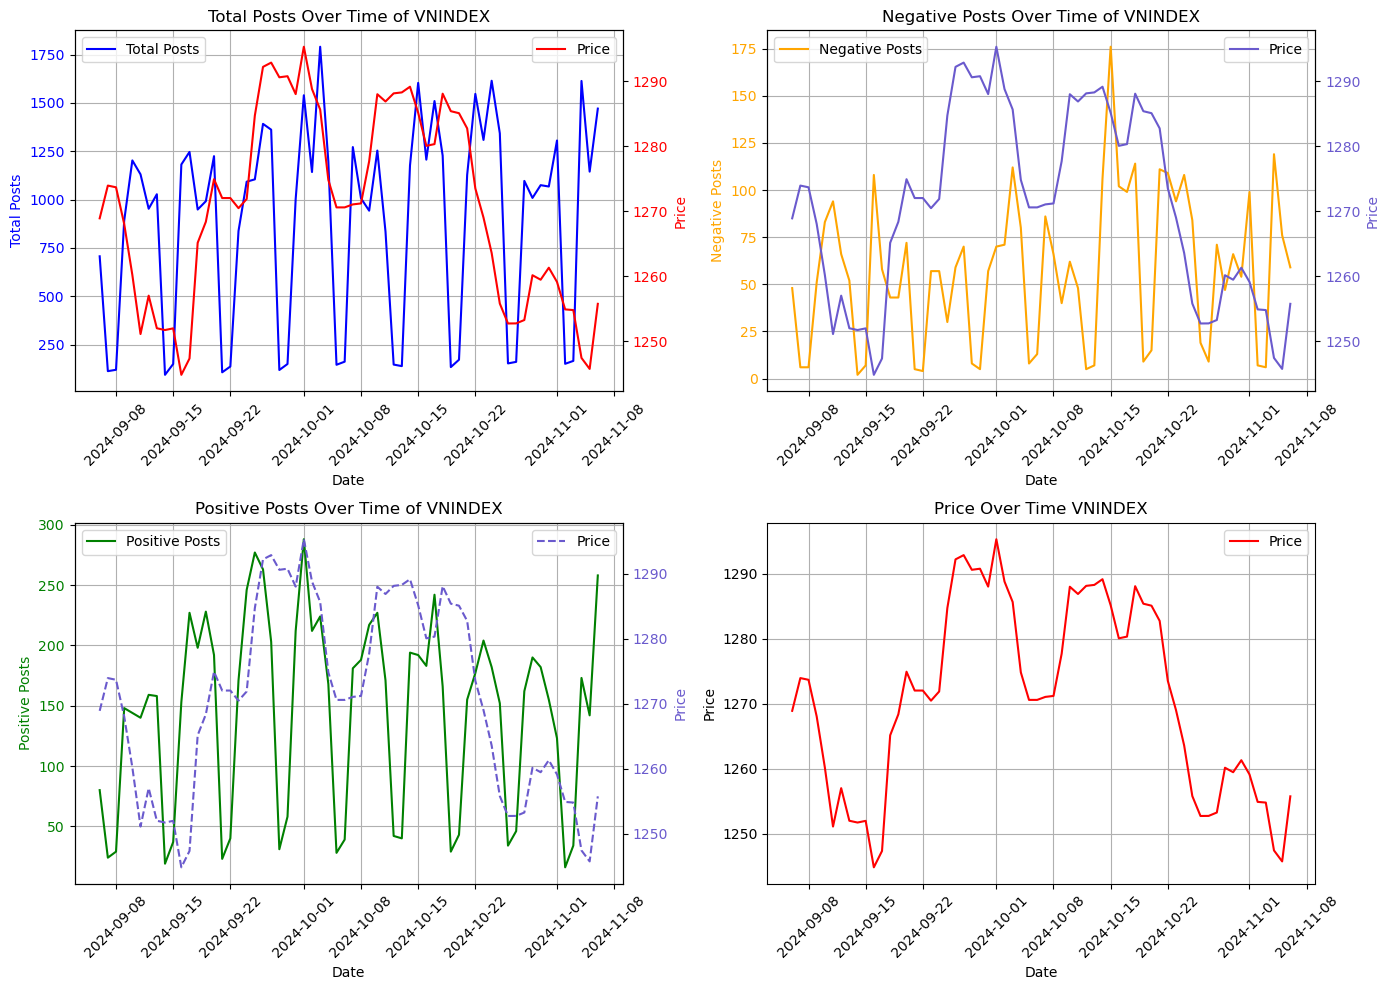

In [107]:
import matplotlib.pyplot as plt

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First subplot: Total Posts with Price
ax1 = axes[0, 0]
ax1.plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfPosts'], label='Total Posts', color='blue')
ax1.set_title("Total Posts Over Time of VNINDEX")
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Posts', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Add the price line with a secondary y-axis
ax1_price = ax1.twinx()
ax1_price.plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='Red')
ax1_price.set_ylabel('Price', color='Red')
ax1_price.tick_params(axis='y', labelcolor='Red')
ax1.legend(loc='upper left')
ax1_price.legend(loc='upper right')

# Second subplot: Negative Posts with Price
ax2 = axes[0, 1]
ax2.plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfNegativePosts'], label='Negative Posts', color='orange')
ax2.set_title("Negative Posts Over Time of VNINDEX")
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Posts', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True)

# Add the price line with a secondary y-axis
ax2_price = ax2.twinx()
ax2_price.plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='Slateblue')
ax2_price.set_ylabel('Price', color='Slateblue')
ax2_price.tick_params(axis='y', labelcolor='Slateblue')
ax2.legend(loc='upper left')
ax2_price.legend(loc='upper right')

# Third subplot: Positive Posts with Price
ax3 = axes[1, 0]
ax3.plot(VNINDEX_analyse['date'], VNINDEX_analyse['NumberOfPositivePosts'], label='Positive Posts', color='green')
ax3.set_title("Positive Posts Over Time of VNINDEX")
ax3.set_xlabel('Date')
ax3.set_ylabel('Positive Posts', color='green')
ax3.tick_params(axis='y', labelcolor='green')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True)

# Add the price line with a secondary y-axis
ax3_price = ax3.twinx()
ax3_price.plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='Slateblue', linestyle='--')
ax3_price.set_ylabel('Price', color='Slateblue')
ax3_price.tick_params(axis='y', labelcolor='Slateblue')
ax3.legend(loc='upper left')
ax3_price.legend(loc='upper right')

# Fourth subplot: Keep unchanged
axes[1, 1].plot(VNINDEX_analyse['date'], VNINDEX_analyse['price'], label='Price', color='red')
axes[1, 1].set_title("Price Over Time VNINDEX")
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [108]:
import seaborn as sns
# Calculate the average and standard deviation of the VNINDEX price
average_vnindex_price = VNINDEX_analyse['price'].mean()
standard_price_deviation = VNINDEX_analyse['price'].std()

# Calculate the correlation between different post categories and the price
correlation_positive_price = (VNINDEX_analyse['NumberOfPositivePosts'] / VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])
correlation_negative_price = (VNINDEX_analyse['NumberOfNegativePosts'] / VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])
correlation_posts_price = (VNINDEX_analyse['NumberOfPosts']).corr(VNINDEX_analyse['price'])

# Calculate percentage change for posts and price
VNINDEX_analyse['posts_pct_change'] = VNINDEX_analyse['NumberOfPosts'].pct_change() 
VNINDEX_analyse['price_pct_change'] = VNINDEX_analyse['price'].pct_change() * 100


# Calculate correlation between percentage change in posts and price
correlation_pct_change = VNINDEX_analyse['posts_pct_change'].corr(VNINDEX_analyse['price_pct_change'])

# Print the results with formatting
print(f"Average VNINDEX Price: {average_vnindex_price:.2f}")
print(f"Standard Deviation of Price: {standard_price_deviation:.2f}")
print(f"Correlation between Positive Posts and Price: {correlation_positive_price:.2f}")
print(f"Correlation between Negative Posts and Price: {correlation_negative_price:.2f}")
print(f"Correlation between the Number of Posts and Price: {correlation_posts_price:.2f}")
print(f"Correlation between Percentage Change of Posts and Price: {correlation_pct_change:.2f}")



Average VNINDEX Price: 1270.77
Standard Deviation of Price: 14.54
Correlation between Positive Posts and Price: 0.31
Correlation between Negative Posts and Price: -0.02
Correlation between the Number of Posts and Price: 0.03
Correlation between Percentage Change of Posts and Price: -0.18


#### 2.6: Visualization the correlation of Percentage Change in Price vs Number of Posts

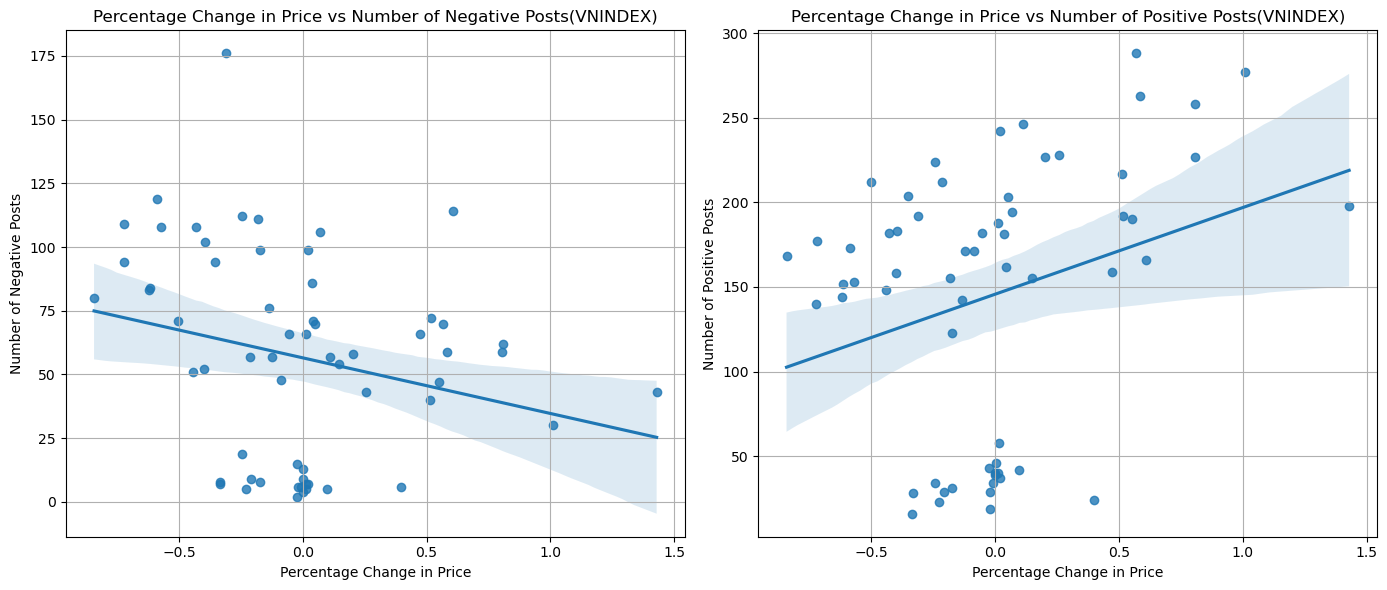

In [109]:
import seaborn as sns

# Set up a 1x2 grid for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Number of Negative Posts
sns.regplot(x='price_pct_change', y='NumberOfNegativePosts', data=VNINDEX_analyse, ax=axes[0])
axes[0].set_title('Percentage Change in Price vs Number of Negative Posts(VNINDEX)')
axes[0].set_xlabel('Percentage Change in Price')
axes[0].set_ylabel('Number of Negative Posts')
axes[0].grid(True)

# Plot for Number of Positive Posts
sns.regplot(x='price_pct_change', y='NumberOfPositivePosts', data=VNINDEX_analyse, ax=axes[1])
axes[1].set_title('Percentage Change in Price vs Number of Positive Posts(VNINDEX)')
axes[1].set_xlabel('Percentage Change in Price')
axes[1].set_ylabel('Number of Positive Posts')
axes[1].grid(True)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
plt.show()

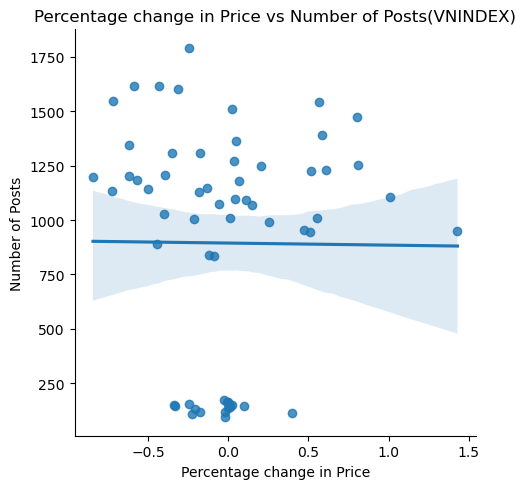

In [110]:
sns.lmplot(x = 'price_pct_change', y = 'NumberOfPosts', data = VNINDEX_analyse)
plt.title('Percentage change in Price vs Number of Posts(VNINDEX)')
plt.xlabel('Percentage change in Price')
plt.ylabel('Number of Posts')

plt.tight_layout()
plt.show()

In [111]:
VNINDEX_analyse['price_change'] = VNINDEX_analyse['price'].diff()
correlation_price_change_posts = VNINDEX_analyse['price_change'].abs().corr(VNINDEX_analyse['NumberOfPosts'])
correlation_price_change_negative_posts = VNINDEX_analyse['price_change'].corr(VNINDEX_analyse['NumberOfNegativePosts'])
correlation_price_change_positive_posts = VNINDEX_analyse['price_change'].corr(VNINDEX_analyse['NumberOfPositivePosts'])

print(f"Correlation between Price Change and Number of Posts(VNINDEX): {correlation_price_change_posts:.2f}")
print(f"Correlation between Price Change and Number of Negative Posts(VNINDEX): {correlation_price_change_negative_posts:.2f}")
print(f"Correlation between Price Change and Number of Positive Posts(VNINDEX): {correlation_price_change_positive_posts:.2f}")

Correlation between Price Change and Number of Posts(VNINDEX): 0.43
Correlation between Price Change and Number of Negative Posts(VNINDEX): -0.24
Correlation between Price Change and Number of Positive Posts(VNINDEX): 0.28


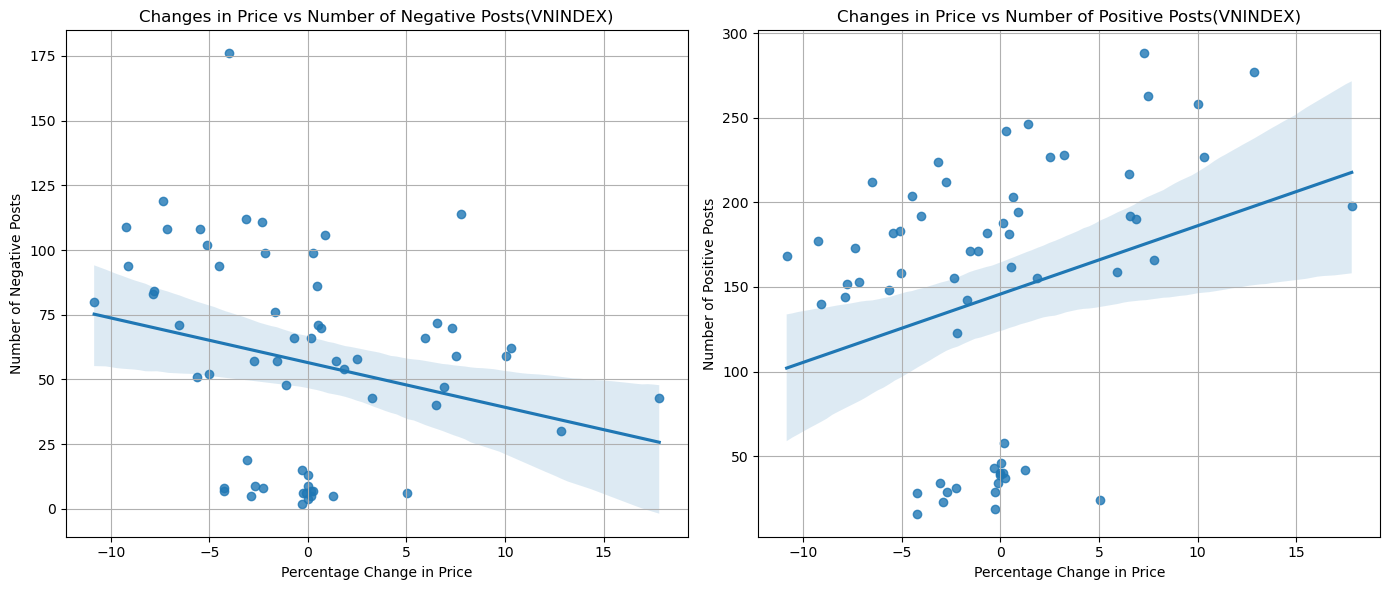

In [112]:
# Set up a 1x2 grid for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.regplot(x='price_change', y='NumberOfNegativePosts', data=VNINDEX_analyse, ax=axes[0])
axes[0].set_title('Changes in Price vs Number of Negative Posts(VNINDEX)')
axes[0].set_xlabel('Percentage Change in Price')
axes[0].set_ylabel('Number of Negative Posts')
axes[0].grid(True)


sns.regplot(x='price_change', y='NumberOfPositivePosts', data=VNINDEX_analyse, ax=axes[1])
axes[1].set_title('Changes in Price vs Number of Positive Posts(VNINDEX)')
axes[1].set_xlabel('Percentage Change in Price')
axes[1].set_ylabel('Number of Positive Posts')
axes[1].grid(True)


plt.tight_layout()
plt.show()

#### 2.7: Categorizing Days Based on Price Change and Analyzing Post Data

In [113]:
# Define thresholds
stability_threshold = 0.25  # Stable days with minimal change
slight_change_threshold = 2  # Slight change days

# Categorize days based on price change
VNINDEX_analyse['price_category'] = 'Stable'
VNINDEX_analyse.loc[(VNINDEX_analyse['price_change'] > stability_threshold) & 
                    (VNINDEX_analyse['price_change'] <= slight_change_threshold), 'price_category'] = 'Slight Change'
VNINDEX_analyse.loc[VNINDEX_analyse['price_change'] > 4, 'price_category'] = 'Significant Increase'
VNINDEX_analyse.loc[VNINDEX_analyse['price_change'] < -4, 'price_category'] = 'Significant Decrease'

# Calculate average number of posts for each category
avg_posts = VNINDEX_analyse.groupby('price_category')['NumberOfPosts'].mean()
avg_positive_posts = VNINDEX_analyse.groupby('price_category')['NumberOfPositivePosts'].mean()
avg_negative_posts = VNINDEX_analyse.groupby('price_category')['NumberOfNegativePosts'].mean()

# Print the results
print("\nAverage Number of Posts by Price Category:")
for category in avg_posts.index:  # Loop only through existing categories
    print(f"{category} Days:")
    print(f"  - Average Number of Posts: {avg_posts[category]:.2f}")
    print(f"  - Average Number of Positive Posts: {avg_positive_posts[category]:.2f}")
    print(f"  - Average Number of Negative Posts: {avg_negative_posts[category]:.2f}")
    print("")


Average Number of Posts by Price Category:
Significant Decrease Days:
  - Average Number of Posts: 1144.50
  - Average Number of Positive Posts: 151.88
  - Average Number of Negative Posts: 84.12

Significant Increase Days:
  - Average Number of Posts: 1098.50
  - Average Number of Positive Posts: 204.92
  - Average Number of Negative Posts: 55.67

Slight Change Days:
  - Average Number of Posts: 986.22
  - Average Number of Positive Posts: 162.44
  - Average Number of Negative Posts: 61.67

Stable Days:
  - Average Number of Posts: 595.52
  - Average Number of Positive Posts: 102.72
  - Average Number of Negative Posts: 37.96



#### 2.8 Visualization of posts number with different changes in price using Bar Plot

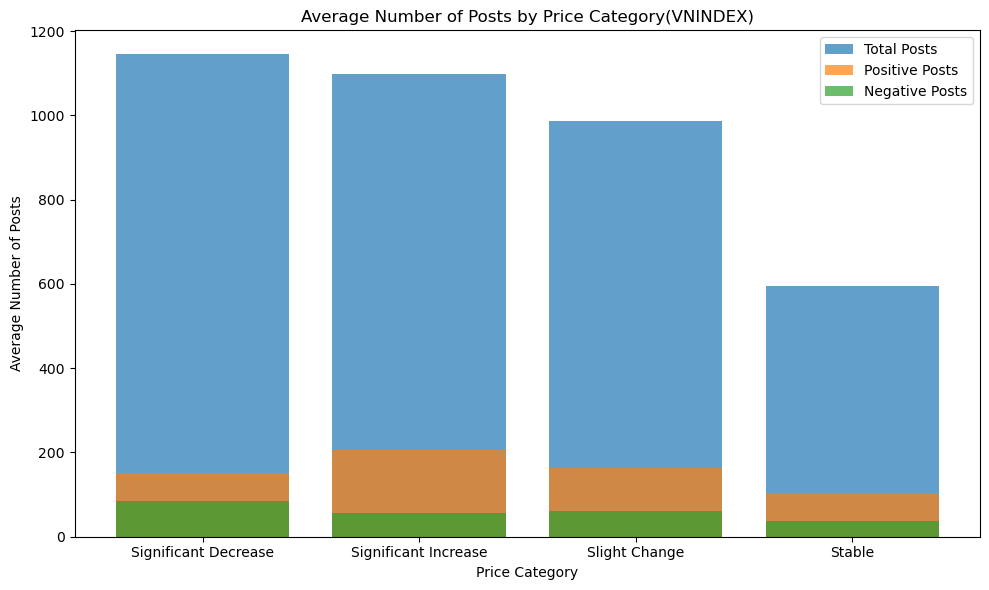

In [114]:
# Plotting average posts per category
categories = avg_posts.index
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the total posts, positive posts, and negative posts
ax.bar(categories, avg_posts, label='Total Posts', alpha=0.7)
ax.bar(categories, avg_positive_posts, label='Positive Posts', alpha=0.7)
ax.bar(categories, avg_negative_posts, label='Negative Posts', alpha=0.7)

ax.set_title('Average Number of Posts by Price Category(VNINDEX)')
ax.set_xlabel('Price Category')
ax.set_ylabel('Average Number of Posts')
ax.legend()

plt.tight_layout()
plt.show()

#### 2.9: Statistics on the number of posts, number of positive posts, number of negative posts, total interactions,.. over time

In [115]:
posts_df.rename(columns = {'date' : 'time'}, inplace = True)
posts_df.insert(3, 'date', posts_df['time'].dt.date)
posts_df.head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,2024-11-06,<NA>,neutral,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,2024-11-06,<NA>,neutral,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None


In [116]:
posts_df['word_count'] = posts_df['originalContent'].fillna('').str.split().str.len()
posts_df.head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol,word_count
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,2024-11-06,<NA>,neutral,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI,2
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,2024-11-06,<NA>,neutral,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None,15


In [117]:

posts_analyze = posts_df.groupby('date').agg(
    number_of_posts = ('postID', 'count'),
    number_of_positive_posts = ('sentiment', lambda x : (x == 'positive').sum()),
    number_of_negative_posts = ('sentiment', lambda x : (x == 'negative').sum()),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum'),
    stock_symbols_mentioned = ('symbol', lambda x : x.nunique())
).reset_index()

posts_analyze = posts_analyze.round(2)
posts_analyze.head(2)


,date,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies,stock_symbols_mentioned
0,2024-09-06,6594,886,341,50.33,10468,14175,392
1,2024-09-07,1242,286,54,82.03,2786,4086,230


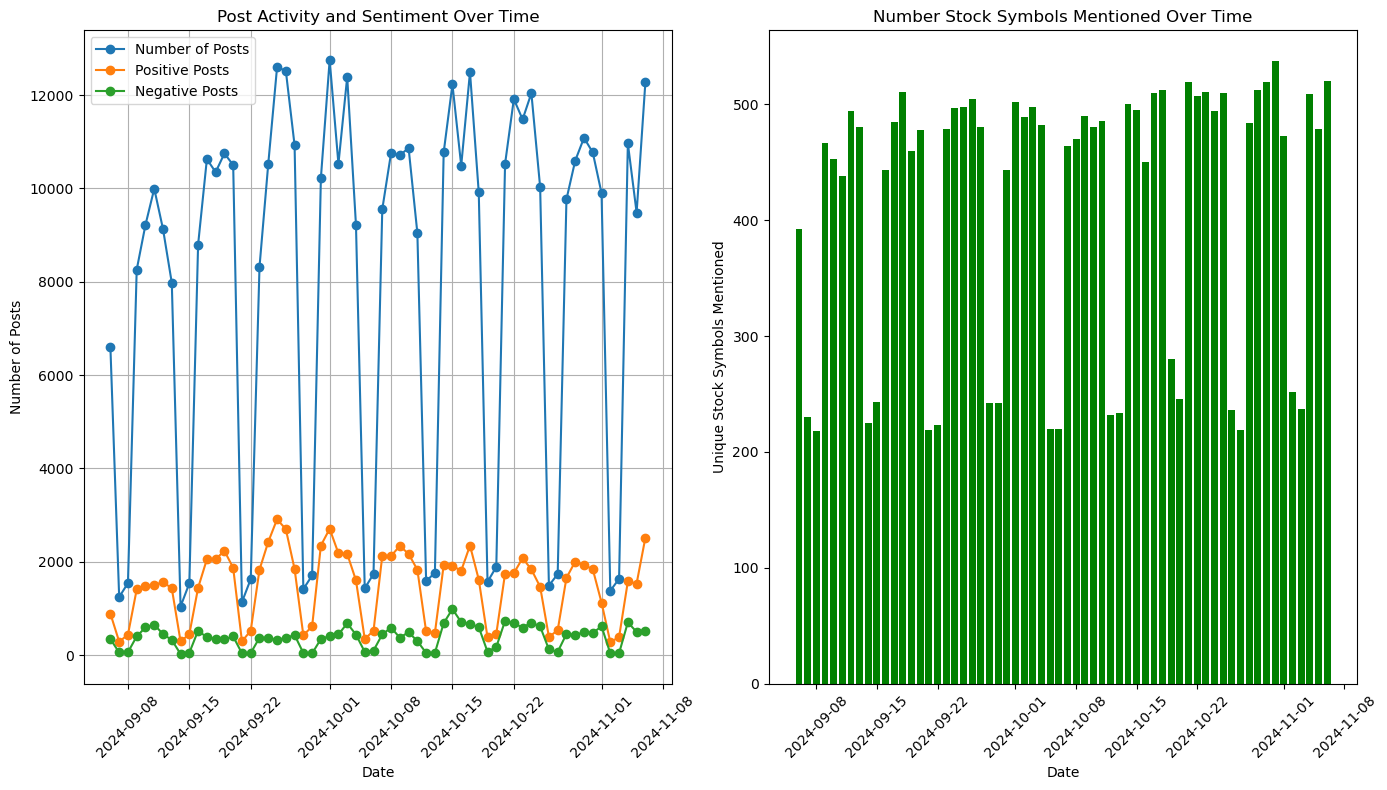

In [118]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Subplot 1: Number of Posts, Positive Posts, Negative Posts over time
plt.subplot(1, 2, 1)
plt.plot(posts_analyze['date'], posts_analyze['number_of_posts'], label='Number of Posts', marker='o')
plt.plot(posts_analyze['date'], posts_analyze['number_of_positive_posts'], label='Positive Posts', marker='o')
plt.plot(posts_analyze['date'], posts_analyze['number_of_negative_posts'], label='Negative Posts', marker='o')
plt.title('Post Activity and Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


# Subplot 2: Stock Symbols Mentioned over time
plt.subplot(1, 2, 2)
plt.bar(posts_analyze['date'], posts_analyze['stock_symbols_mentioned'], color='green')
plt.title('Number Stock Symbols Mentioned Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Stock Symbols Mentioned')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [119]:
sentiment_analysis = posts_df.groupby('sentiment').agg(
    number_of_posts = ('postID', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum'),
    stock_symbols_mentioned = ('symbol', lambda x: x.nunique())
).reset_index()

sentiment_analysis

,sentiment,number_of_posts,average_posts_len,total_likes,total_replies,stock_symbols_mentioned
0,negative,23261,45.149693,41720,73212,541
1,neutral,372614,57.393007,609447,838558,1372
2,positive,91393,98.856729,219205,289075,943


In [120]:
unique_users_posts_df = posts_df.drop_duplicates(subset='postID').copy()
user_activity = unique_users_posts_df.groupby('userid').agg(
    userName = ('username', 'first'),
    number_of_posts = ('postID', 'count'), 
    number_of_positive_posts = ('sentiment', lambda x : (x == 'positive').sum()),
    number_of_negative_posts = ('sentiment', lambda x : (x == 'negative').sum()),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()




In [121]:
user_activity.sort_values(by = 'number_of_posts', ascending = False, inplace = True)
user_activity = user_activity.round(2)
user_activity.head(3)

,userid,userName,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies
357,0406662e-2ee3-49fe-8ce1-317a1aec3dc8,gametaophoton,1168,0,0,24.01,328,1255
8109,5a1365a4-46fc-41d7-b021-45f7d02d639f,THÍCH CHƠI XÍCH ĐU,933,0,0,8.94,885,1067
88,00cafff2-e845-4022-bafe-5113a8e7924d,Helen Lan Anh,865,489,339,9.19,579,1292


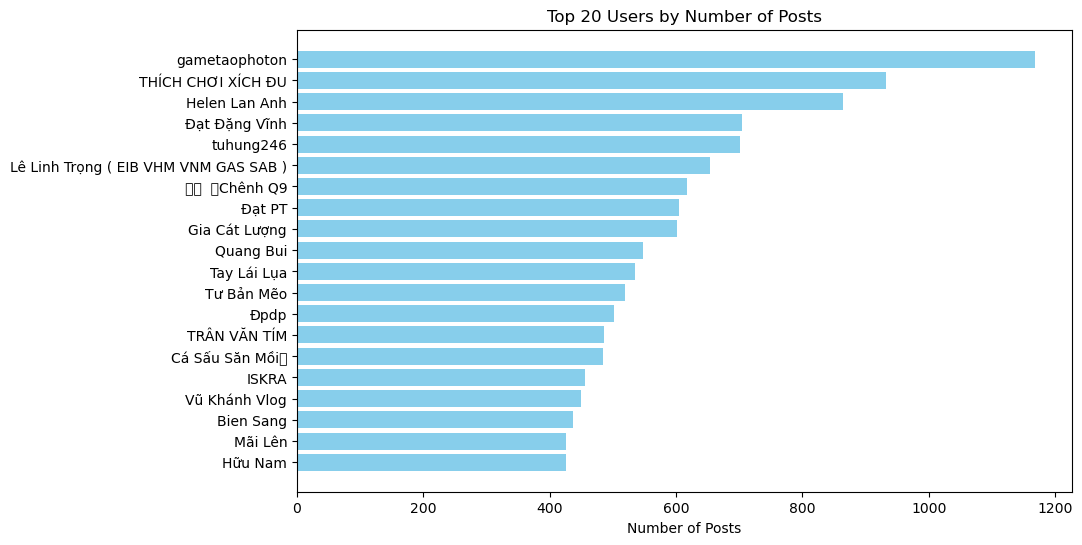

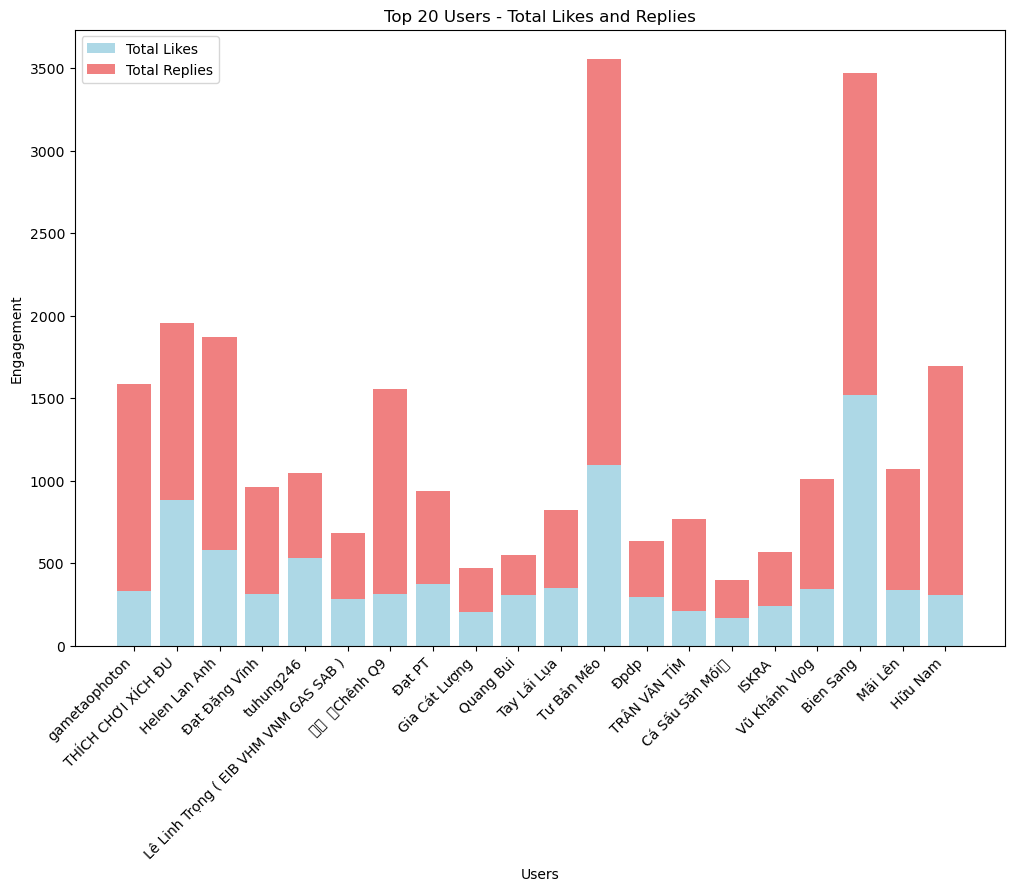

In [122]:
# Select top 20 users by number of posts
top_users = user_activity.nlargest(20, 'number_of_posts')
user_names = top_users['userName']

# Horizontal Bar Chart for `number_of_posts`
plt.figure(figsize=(10, 6))
plt.barh(user_names, top_users['number_of_posts'], color='skyblue')
plt.xlabel('Number of Posts')
plt.title('Top 20 Users by Number of Posts')
plt.gca().invert_yaxis()
plt.show()

# Stacked Bar Chart for `total_likes` and `total_replies`
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(user_names, top_users['total_likes'], label='Total Likes', color='lightblue')
ax.bar(user_names, top_users['total_replies'], bottom=top_users['total_likes'], label='Total Replies', color='lightcoral')

ax.set_xlabel('Users')
ax.set_ylabel('Engagement')
ax.set_title('Top 20 Users - Total Likes and Replies')
plt.xticks(rotation=45, ha='right')
ax.legend()
plt.show()

In [123]:
symbol_mentions_over_time = posts_df.groupby(['date', 'symbol']).agg(
    number_of_mentions = ('symbol', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()

In [124]:
symbol_mentions_over_time.round(2).head(2)

,date,symbol,number_of_mentions,average_posts_len,total_likes,total_replies
0,2024-09-06,$APT,1,11.0,0,0
1,2024-09-06,$BTC,70,31.8,83,289


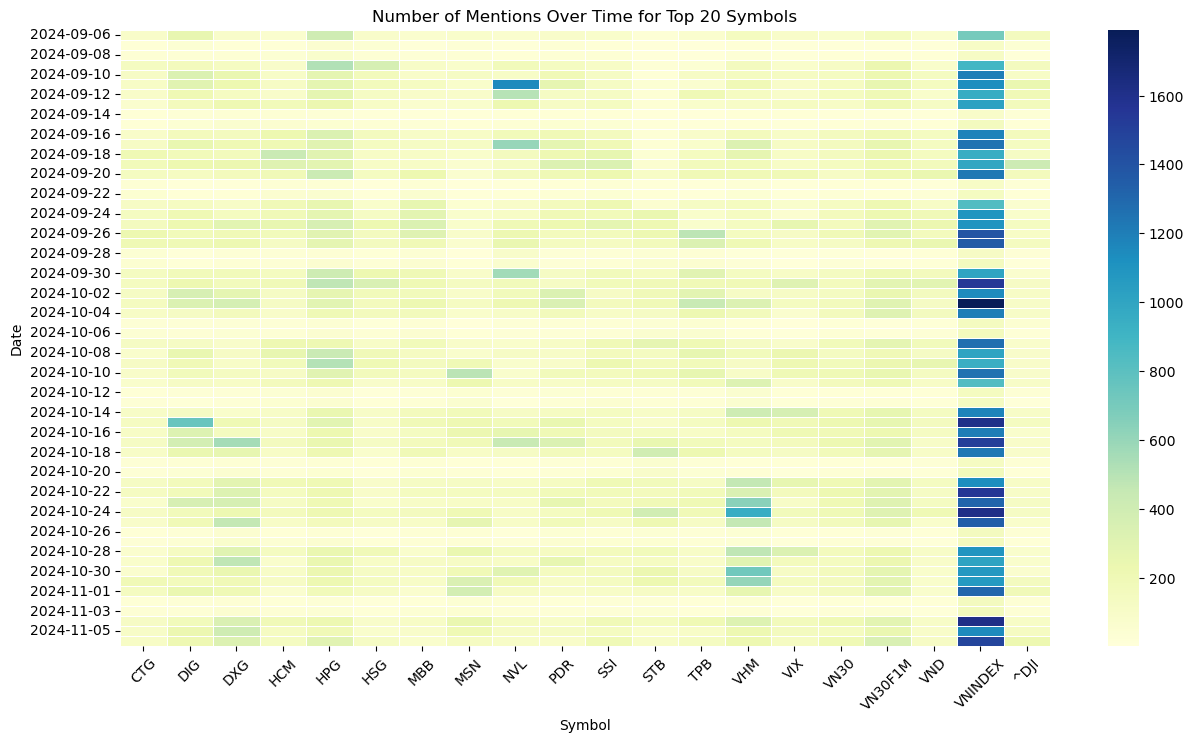

In [125]:
# Filter top 20 symbols based on total number of mentions
top_symbols = symbol_mentions_over_time.groupby('symbol')['number_of_mentions'].sum().nlargest(20).index
top_symbol_data = symbol_mentions_over_time[symbol_mentions_over_time['symbol'].isin(top_symbols)]

# Pivot the data for heatmap
heatmap_data = top_symbol_data.pivot_table(index='date', columns='symbol', values='number_of_mentions', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title('Number of Mentions Over Time for Top 20 Symbols')
plt.xlabel('Symbol')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

In [126]:
posts_df['hour'] = posts_df['time'].dt.hour  # Extract the hour from the date
activity_by_hour = posts_df.groupby('hour').agg(
    number_of_posts = ('postID', 'count'),
    average_posts_len = ('word_count', 'mean'),
    total_likes = ('totalLikes', 'sum'),
    total_replies = ('totalReplies', 'sum')
).reset_index()

In [127]:
activity_by_hour = activity_by_hour.round(2)
activity_by_hour.head(2)

,hour,number_of_posts,average_posts_len,total_likes,total_replies
0,0,2830,129.89,7230,8790
1,1,1184,128.18,2695,4461


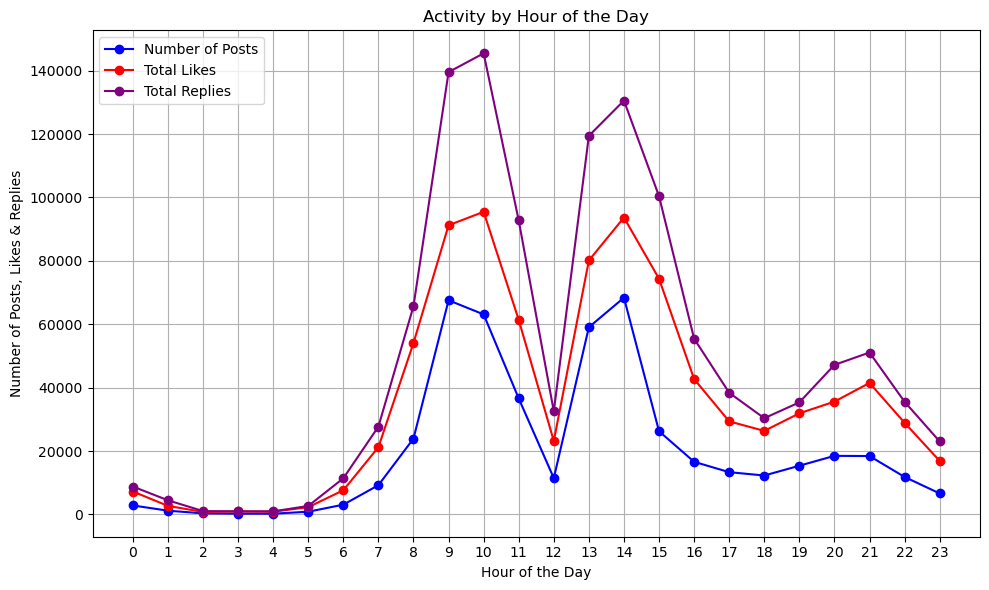

In [128]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the three metrics (number_of_posts, total_likes, total_replies) on the primary y-axis
plt.plot(activity_by_hour['hour'], activity_by_hour['number_of_posts'], marker='o', label='Number of Posts', color='blue')
plt.plot(activity_by_hour['hour'], activity_by_hour['total_likes'], marker='o', label='Total Likes', color='red')
plt.plot(activity_by_hour['hour'], activity_by_hour['total_replies'], marker='o', label='Total Replies', color='purple')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Posts, Likes & Replies')
plt.title('Activity by Hour of the Day')

# Customize ticks and grid
plt.xticks(range(24))
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

---
## Part 2: Basic analysis and calculations using probabilistic approaches

### Analysis Techniques

- **Bayesian Inference**
- **Markov Chains**


### Task 1: Preparation 

#### 1.1: Store data for each symbols in a dict

In [129]:
import os
import re
# Create a directory to store the output files
symbol_list = posts_df['symbol'].unique()
symbol_list = symbol_list.tolist()

valid_symbols = []
invalid_symbols = []
# Remove None from the list
symbol_list = [symbol for symbol in symbol_list if symbol is not None]
symbol_price_data_dict = {}
symbol_price_data_dict = {}
for symbol in symbol_list:
    clean_symbol = re.sub(r'[^a-zA-Z0-9]', '', symbol)
    # check if the file exists
    if not os.path.exists(f"price/{clean_symbol}.csv"):
        symbol_price_data_dict[symbol] = None
        invalid_symbols.append(symbol)
        continue
    data = pd.read_csv(f"price/{clean_symbol}.csv")
    symbol_price_data_dict[symbol] = data
    valid_symbols.append(symbol)

symbol_groups = posts_df.groupby('symbol')


symbols_data_dict = {symbol : data for symbol, data in symbol_groups}

# Print success message
print(f"Successfully loaded data from price folder for {len(valid_symbols)} symbols.")
print(f"Price files not found for {len(invalid_symbols)} symbols.")



Successfully loaded data from price folder for 1157 symbols.
Price files not found for 324 symbols.


In [130]:
# check data is store properly
symbols_data_dict['$AAVE'].head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol,word_count,hour
73478,28938964,Short mạnh thôi người anh em,2024-10-29 12:46:20.700000+07:00,2024-10-29,<NA>,neutral,0,0,NaN,"{'symb': '$AAVE', 'price': 153.62}",Bàn Tay Vô Hình,2d980e79-7b61-4ac7-9ad6-6aa20a217b2b,0,1,153.62,$AAVE,6,12
149123,28772283,Cập nhật 21h tối 19/10: Btc điều chỉnh làm các...,2024-10-19 21:04:18.310000+07:00,2024-10-19,<NA>,neutral,0,0,NaN,"{'symb': '$AAVE', 'price': 158.86}",geo,d9f30fe7-0be1-457f-8cda-f48b83c3342c,0,1,158.86,$AAVE,32,21


#### 1.2: Data Processing and Aggregation for Stock Symbol: Combining Social Media Post Data and Stock Price Changes 

In [131]:
import re
import os
import pandas as pd
from dateutil.parser import isoparser
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def to_post_analysis_dataframe(symbol_name):

    # Sort symbol data by time and calculate price change
    symbol_data_frame = symbols_data_dict[symbol_name]
    symbol_data_frame = symbol_data_frame.sort_values(by='time', ascending=True)
    symbol_data_frame['price_change'] = symbol_data_frame['price'].diff()
    
    # Import price data for each traded period
    price_data_frame = symbol_price_data_dict[symbol_name]
    if price_data_frame is None:
        return None
    
    price_data_frame['time'] = price_data_frame['time'].astype('string')
    price_data_frame['time'] = price_data_frame['time'].apply(
        lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT
    )
    price_data_frame['date'] = price_data_frame['time'].dt.date

    # Calculate daily price change
    daily_change = price_data_frame.groupby('date').apply(
        lambda x : pd.Series({
            'open' : x['open'].iloc[0],
            'high' : x['high'].max(),
            'close' : x['close'].iloc[-1],
            'daily_change' : x['close'].iloc[-1] - x['open'].iloc[0]
        })
    ).reset_index()
    
    # Aggregate post data for each date related to the symbol
    posts_analyze_symbol = symbols_data_dict[symbol_name].groupby('date').agg(
        number_of_posts=('postID', 'count'),
        number_of_positive_posts=('sentiment', lambda x: (x == 'positive').sum()),
        number_of_negative_posts=('sentiment', lambda x: (x == 'negative').sum()),
        average_posts_len=('word_count', 'mean'),
        total_likes=('totalLikes', 'sum'),
        total_replies=('totalReplies', 'sum'),
    ).reset_index()

    # Round results and sort by date
    posts_analyze_symbol = posts_analyze_symbol.round(2)
    posts_analyze_symbol = posts_analyze_symbol.sort_values(by='date', ascending=True)

    # Merge posts data with daily price changes, keeping all dates from the price data
    posts_analyze_symbol = posts_analyze_symbol.merge(
    daily_change[['date', 'open', 'high', 'close', 'daily_change']],
    on='date', 
    how='right'
    ).fillna(0)

    # Fill any missing values with 0
    
    
    return posts_analyze_symbol


#### Explanation:
Function: to_post_analysis_dataframe.
This code processes stock-related data by combining information on posts and price changes. It first sanitizes the stock symbol name to match file names, then checks if the relevant price data file exists. If it does, the function loads the file, calculates daily price changes, and prepares daily aggregated data for posts related to the stock symbol, such as the number of posts, sentiment counts, and engagement metrics like likes and replies. Finally, it merges the aggregated post data with the daily price change data, producing a DataFrame that shows daily summaries of both stock price movements and post engagement, ready for further analysis.

In [132]:
# Store the post analysis data for each symbol in a dictionary
symbols_posts_data = {symbol : to_post_analysis_dataframe(symbol) for symbol in valid_symbols}


### Task 2: Perform calculations and analysis

#### 2.1: Using Bayesian Inference to predict the changes in prices

In [133]:
# check if data in price folders are loaded successfully
symbols_posts_data['VNINDEX'].head(2)

,date,number_of_posts,number_of_positive_posts,number_of_negative_posts,average_posts_len,total_likes,total_replies,open,high,close,daily_change
0,2024-09-04,0.0,0.0,0.0,0.0,0,0,1273.86,1277.27,1275.80,1.94
1,2024-09-05,0.0,0.0,0.0,0.0,0,0,1276.46,1282.21,1268.21,-8.25


#### 2.1.1 Create probability_bayesian_inference_posts Function
Calculates the conditional probabilities of stock price changes (up, down, stable) based on post activity levels (high, moderate, low) using Bayesian inference. Takes columns for dates, price changes, and post counts as inputs, and returns a dictionary of probabilities.

$$
P(\text{Price changes} \mid \text{Number of Posts}) = \frac{P(\text{Number of Posts} \mid \text{Price changes}) \times P(\text{Price changes})}{P(\text{Number of Posts})}
$$

$$
P(\text{Number of Posts} \mid \text{Price changes}) = \frac{P(\text{Number of Posts and Price changes})}{P(\text{Price changes})}
$$

$$
P(\text{Number of Posts}) = \frac{\sum (\text{dataframe['Number of Posts']} =>< \text{Threshold})}{\text{Number of Trading Days}}
$$

$$
P(\text{Price changes}) = \frac{\sum (\text{dataframe['Price changes']} =>< \text{0})}{\text{Number of Trading Days}}

In [134]:
def probability_bayesian_inference_posts(date_column, price_column, posts_column):
    # Retrieve the data frame for the given stock symbol
    symbol_data_frame = pd.DataFrame({
        'date' : date_column,
        'daily_change' : price_column,
        'number_of_posts' : posts_column
    })
    
    # handle NULL case
    if symbol_data_frame is None:
        return 'Data not found for the given symbol.' 
    
    # Calculate the number of traded days (unique dates)
    number_traded_days = symbol_data_frame['date'].nunique()
    
    # Calculate the prior probabilities for price movements (up, down, stable)
    prior_price_up = (symbol_data_frame['daily_change'] > 0).sum() / number_traded_days
    prior_price_drop = (symbol_data_frame['daily_change'] < 0).sum() / number_traded_days
    prior_price_stable = (symbol_data_frame['daily_change'] == 0).sum() / number_traded_days
    
    # Calculate the average and standard deviation of posts per day
    mean_posts = symbol_data_frame['number_of_posts'].mean()
    std_dev_posts = symbol_data_frame['number_of_posts'].std()
    
    # Define the thresholds for categorizing the number of posts (low, high, normal)
    low_threshold = max(0, mean_posts - std_dev_posts)  # Low posts: below one standard deviation
    high_threshold = mean_posts + std_dev_posts         # High posts: above one standard deviation
  
    # Calculate the number of days for each activity category (high, low, normal posts)
    high_activity_days = (symbol_data_frame['number_of_posts'] > high_threshold).sum()
    low_activity_days = (symbol_data_frame['number_of_posts'] < low_threshold).sum()
    normal_activity_days = number_traded_days - high_activity_days - low_activity_days
    
    # Calculate the probabilities of high, low, and normal posting activity
    high_activity_prob = high_activity_days / number_traded_days if number_traded_days > 0 else 0
    low_activity_prob = low_activity_days / number_traded_days if number_traded_days > 0 else 0
    normal_activity_prob = 1 - high_activity_prob - low_activity_prob
    
    # Calculate the probabilities of different combinations of posts and price movements for each category
    # Case 1: High number of posts
    P_high_posts_and_price_up = ((symbol_data_frame['number_of_posts'] > high_threshold) 
                                 & (symbol_data_frame['daily_change'] > 0)).sum() / number_traded_days
    P_high_posts_and_price_down = ((symbol_data_frame['number_of_posts'] > high_threshold) 
                                   & (symbol_data_frame['daily_change'] < 0)).sum() / number_traded_days
    P_high_posts_and_price_stable = ((symbol_data_frame['number_of_posts'] > high_threshold) 
                                     & (symbol_data_frame['daily_change'] == 0)).sum() / number_traded_days
    
    # Case 2: Low number of posts
    P_low_posts_and_price_up = ((symbol_data_frame['number_of_posts'] < low_threshold) 
                                 & (symbol_data_frame['daily_change'] > 0)).sum() / number_traded_days
    P_low_posts_and_price_down = ((symbol_data_frame['number_of_posts'] < low_threshold) 
                                   & (symbol_data_frame['daily_change'] < 0)).sum() / number_traded_days
    P_low_posts_and_price_stable = ((symbol_data_frame['number_of_posts'] < low_threshold) 
                                     & (symbol_data_frame['daily_change'] == 0)).sum() / number_traded_days
    
    # Case 3: Moderate number of posts (between low and high thresholds)
    P_moderate_posts_and_price_up = (
        ((symbol_data_frame['number_of_posts'] >= low_threshold) & 
        (symbol_data_frame['number_of_posts'] <= high_threshold) & 
        (symbol_data_frame['daily_change'] > 0)).sum() / number_traded_days
    )
    P_moderate_posts_and_price_down = (
        ((symbol_data_frame['number_of_posts'] >= low_threshold) & 
        (symbol_data_frame['number_of_posts'] <= high_threshold) & 
        (symbol_data_frame['daily_change'] < 0)).sum() / number_traded_days
    )
    P_moderate_posts_and_price_stable = (
        ((symbol_data_frame['number_of_posts'] >= low_threshold) & 
        (symbol_data_frame['number_of_posts'] <= high_threshold) & 
        (symbol_data_frame['daily_change'] == 0)).sum() / number_traded_days
    )
        
    # Now, calculate the conditional probabilities P(Posts | Price Change) using Bayes' theorem
    # For each price change category (up, down, stable), calculate the conditional probabilities
    
    # Calculate P(High Posts | Price changes)
    # Follow the formula: P(High Posts | Price Up) = P(High Posts and Price Up) / P(Price changes)
    P_high_posts_given_price_up = P_high_posts_and_price_up / prior_price_up if prior_price_up > 0 else 0
    P_high_posts_given_price_down = P_high_posts_and_price_down / prior_price_drop if prior_price_drop > 0 else 0
    P_high_posts_given_price_stable = P_high_posts_and_price_stable / prior_price_stable if prior_price_stable > 0 else 0
    
    # Calculate P(Moderate Posts | Price Up)
    # Follow the formula: P(Moderate Posts | Price Up) = P(Moderate Posts and Price changes) / P(Price changes)
    P_moderate_posts_given_price_up = P_moderate_posts_and_price_up / prior_price_up if prior_price_up > 0 else 0
    P_moderate_posts_given_price_down = P_moderate_posts_and_price_down / prior_price_drop if prior_price_drop > 0 else 0
    P_moderate_posts_given_price_stable = P_moderate_posts_and_price_stable / prior_price_stable if prior_price_stable > 0 else 0
    
    # Calculate P(Low Posts | Price Up)
    # Follow the formula: P(Low Posts | Price Up) = P(Low Posts and Price changes) / P(Price changes)
    P_low_posts_given_price_up = P_low_posts_and_price_up / prior_price_up if prior_price_up > 0 else 0
    P_low_posts_given_price_down = P_low_posts_and_price_down / prior_price_drop if prior_price_drop > 0 else 0
    P_low_posts_given_price_stable = P_low_posts_and_price_stable / prior_price_stable if prior_price_stable > 0 else 0
    
    # Calculate the final probabilities for price changes given high, moderate, and low posts
    # Follow the formula: P(Price changes | Posts) = [P(Posts | Price changes) * P(Price changes)] / P(Posts)
    P_price_up_given_high_posts = (P_high_posts_given_price_up * prior_price_up) / high_activity_prob if high_activity_prob > 0 else 0
    P_price_down_given_high_posts = (P_high_posts_given_price_down * prior_price_drop) / high_activity_prob if high_activity_prob > 0 else 0
    P_price_stable_given_high_posts = (P_high_posts_given_price_stable * prior_price_stable) / high_activity_prob if high_activity_prob > 0 else 0

    P_price_up_given_moderate_posts = (P_moderate_posts_given_price_up * prior_price_up) / normal_activity_prob if normal_activity_prob > 0 else 0
    P_price_down_given_moderate_posts = (P_moderate_posts_given_price_down * prior_price_drop) / normal_activity_prob if normal_activity_prob > 0 else 0
    P_price_stable_given_moderate_posts = (P_moderate_posts_given_price_stable * prior_price_stable) / normal_activity_prob if normal_activity_prob > 0 else 0

    P_price_up_given_low_posts = (P_low_posts_given_price_up * prior_price_up) / low_activity_prob if low_activity_prob > 0 else 0
    P_price_down_given_low_posts = (P_low_posts_given_price_down * prior_price_drop) / low_activity_prob if low_activity_prob > 0 else 0
    P_price_stable_given_low_posts = (P_low_posts_given_price_stable * prior_price_stable) / low_activity_prob if low_activity_prob > 0 else 0

    # Return the final conditional probabilities for each scenario
    return {
    "P(Price Up | High Posts)": round(P_price_up_given_high_posts, 4),
    "P(Price Down | High Posts)": round(P_price_down_given_high_posts, 4),
    "P(Price Stable | High Posts)": round(P_price_stable_given_high_posts, 4),
    
    "P(Price Up | Moderate Posts)": round(P_price_up_given_moderate_posts, 4),
    "P(Price Down | Moderate Posts)": round(P_price_down_given_moderate_posts, 4),
    "P(Price Stable | Moderate Posts)": round(P_price_stable_given_moderate_posts, 4),
    
    "P(Price Up | Low Posts)": round(P_price_up_given_low_posts, 4),
    "P(Price Down | Low Posts)": round(P_price_down_given_low_posts, 4),
    "P(Price Stable | Low Posts)": round(P_price_stable_given_low_posts, 4)
}


In [135]:
VNINDEX_posts_df = symbols_posts_data['VNINDEX']
P_VNINDEX_number_of_posts = probability_bayesian_inference_posts(VNINDEX_posts_df['date'], VNINDEX_posts_df['daily_change'], VNINDEX_posts_df['number_of_posts'])
P_VNINDEX_number_positive_posts = probability_bayesian_inference_posts(VNINDEX_posts_df['date'], VNINDEX_posts_df['daily_change'], VNINDEX_posts_df['number_of_positive_posts'])
P_VNINDEX_number_negative_posts = probability_bayesian_inference_posts(VNINDEX_posts_df['date'], VNINDEX_posts_df['daily_change'], VNINDEX_posts_df['number_of_negative_posts'])

#### 2.1.2 Heatmap illustration for the probability of the changes in price pf VNINDEX given number of posts, number of positive posts, number of negative posts

In [136]:
# Create a function to convert probability in the dict into a matrix

def dict_to_matrix(data):
    # Extract row and column labels from keys
    rows = sorted(set(key.split(" | ")[0].replace("P(", "") for key in data.keys()))
    columns = sorted(set(key.split(" | ")[1].replace(")", "") for key in data.keys()))
    
    # Create an empty DataFrame with rows as index and columns as columns
    matrix_df = pd.DataFrame(index=rows, columns=columns)
    
    # Populate the DataFrame with values from the dictionary
    for key, value in data.items():
        row_label = key.split(" | ")[0].replace("P(", "")
        col_label = key.split(" | ")[1].replace(")", "")
        matrix_df.loc[row_label, col_label] = value

    # Convert the DataFrame to a matrix (NumPy array) and fill NaN with 0 if needed
    matrix = matrix_df.fillna(0).values  # .fillna(0) is used to replace any missing values with 0

    return matrix_df, matrix

data = P_VNINDEX_number_positive_posts
matrix_df, matrix = dict_to_matrix(data)

print("DataFrame:\n", matrix_df)
print("\nMatrix:\n", matrix)


DataFrame:
              High Posts Low Posts Moderate Posts
Price Down          0.0       0.6         0.6216
Price Stable        0.0       0.0            0.0
Price Up            1.0       0.4         0.3784

Matrix:
 [[0.     0.6    0.6216]
 [0.     0.     0.    ]
 [1.     0.4    0.3784]]


#### 2.1.3 Heatmap Illustration function: Probability of Price Changes in VNINDEX

In [137]:
def plot_probability_heatmap(data, title):
    # Check if data is a dictionary, convert it to matrix
    if isinstance(data, dict):
        _, matrix = dict_to_matrix(data)
    
    # Check if data is a 3x3 matrix (NumPy array)
    elif isinstance(data, np.ndarray) and data.shape == (3, 3):
        matrix = data
    else:
        raise ValueError("Data must be either a dictionary or a 3x3 matrix.") 
    
    col_labels = ['High Posts', 'Moderate Posts', 'Low Posts']
    row_labels = ['Price Down', 'Price Stable', 'Price Up']
    
    # Create the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=col_labels, yticklabels=row_labels)
    plt.title(title)
    plt.xlabel('Number of posts')
    plt.ylabel('Changes in price')
    plt.yticks(rotation = 0) 
    plt.show()
 

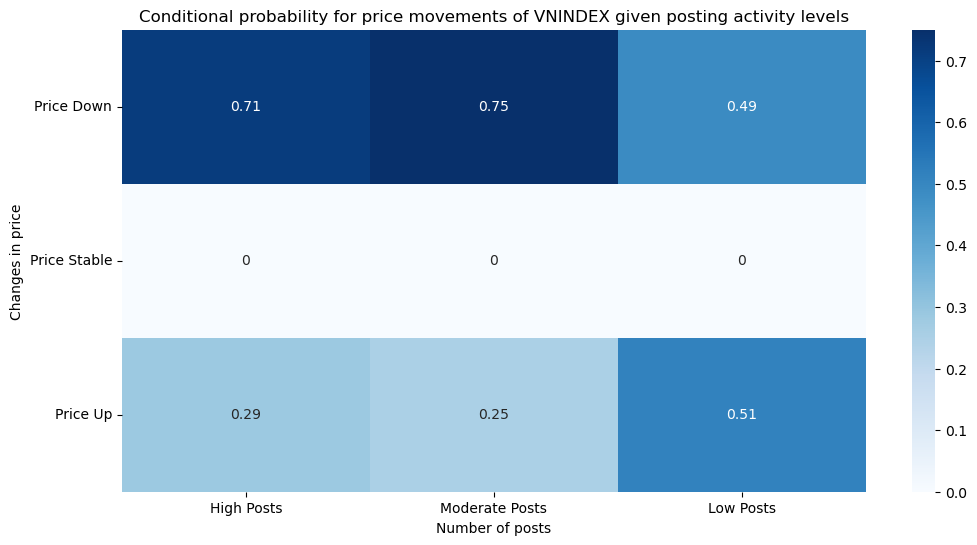

In [138]:
plot_probability_heatmap(P_VNINDEX_number_of_posts, 'Conditional probability for price movements of VNINDEX given posting activity levels')

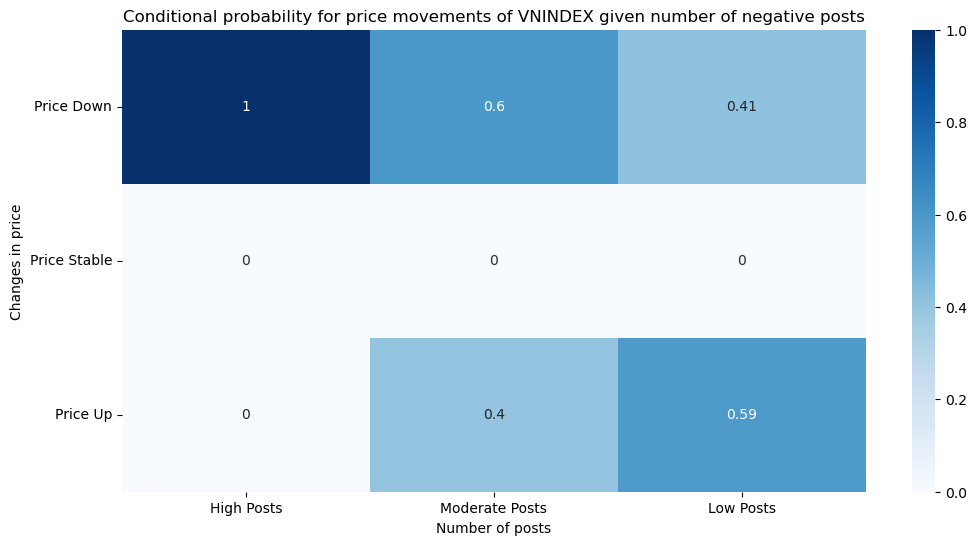

In [139]:
plot_probability_heatmap(P_VNINDEX_number_negative_posts, 'Conditional probability for price movements of VNINDEX given number of negative posts')

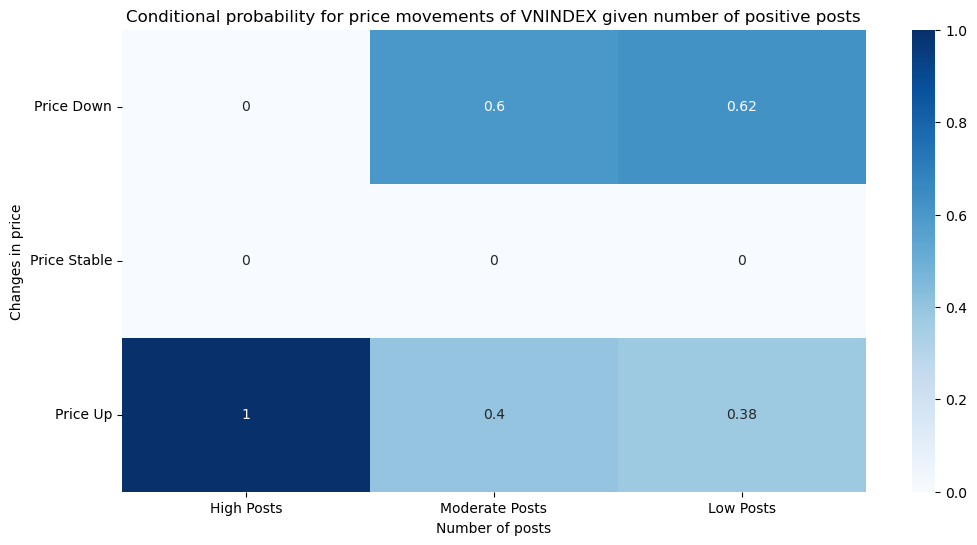

In [140]:
plot_probability_heatmap(P_VNINDEX_number_positive_posts, 'Conditional probability for price movements of VNINDEX given number of positive posts')

#### 2.1.4 Calculating and Storing Symbol Probabilities as Matrices

In [141]:
warnings.filterwarnings("ignore")
symbol_probabilities_matrices = {}

# Loop through each symbol in valid_symbols
for symbol in valid_symbols:
    temp_df = symbols_posts_data[symbol]
    
    # Assuming probability_bayesian_inference_posts expects arrays as inputs
    dates = temp_df['date'].values  # Convert Series to numpy array
    daily_changes = temp_df['daily_change'].values
    number_of_posts = temp_df['number_of_posts'].values
    
    # Pass the arrays to the function and store the result
    _, symbol_probabilities_matrices[symbol] = dict_to_matrix(probability_bayesian_inference_posts(dates, daily_changes, number_of_posts))

# check if matrix are correctly converted
symbol_probabilities_matrices



{'^DJI': array([[0.    , 0.5   , 0.4872],
        [0.    , 0.    , 0.    ],
        [1.    , 0.5   , 0.5128]]),
 'VNINDEX': array([[0.7143, 0.75  , 0.4865],
        [0.    , 0.    , 0.    ],
        [0.2857, 0.25  , 0.5135]]),
 'BID': array([[0.5   , 0.6   , 0.6923],
        [0.    , 0.    , 0.0769],
        [0.5   , 0.4   , 0.2308]]),
 'CTG': array([[0.    , 0.75  , 0.5385],
        [0.    , 0.    , 0.0513],
        [1.    , 0.25  , 0.4103]]),
 'DXG': array([[0.4286, 0.8   , 0.4167],
        [0.    , 0.    , 0.1111],
        [0.5714, 0.2   , 0.4722]]),
 'HPG': array([[0.1429, 1.    , 0.6757],
        [0.    , 0.    , 0.0811],
        [0.8571, 0.    , 0.2432]]),
 'KBC': array([[0.    , 0.    , 0.6087],
        [0.    , 0.    , 0.1087],
        [1.    , 0.    , 0.2826]]),
 'MSN': array([[0.7143, 0.75  , 0.5676],
        [0.    , 0.25  , 0.027 ],
        [0.2857, 0.    , 0.4054]]),
 'PDR': array([[0.4444, 0.5   , 0.5429],
        [0.    , 0.    , 0.0857],
        [0.5556, 0.5   , 0.3714]

#### 2.1.5: Calculating and Plotting the Averaged Conditional Probability Matrix for Price Movements Based on Posting Activity

In [142]:
def normalize_matrix(matrix):
    # Calculate the sum of each column
    column_sums = np.sum(matrix, axis=0)
    
    # Avoid division by zero by setting any zero column sums to 1 temporarily
    column_sums[column_sums == 0] = 1
    
    # Normalize each column by dividing by its sum
    normalized_matrix = matrix / column_sums
    
    return normalized_matrix

#### 2.1.6: Illustrate the probability of the changes in price of all symbols based on posting activities using heatmap

In [143]:
sum_of_matrices = None 
for matrix in symbol_probabilities_matrices.values():
    if sum_of_matrices is None:
        sum_of_matrices = matrix 
    else:
        sum_of_matrices += matrix 
sum_of_matrices /= len(symbol_probabilities_matrices)
sum_of_matrices = normalize_matrix(sum_of_matrices)
print(sum_of_matrices)
    

[[0.31719732 0.59073788 0.33133878]
 [0.27796596 0.13571539 0.37790351]
 [0.40483672 0.27354673 0.29075771]]


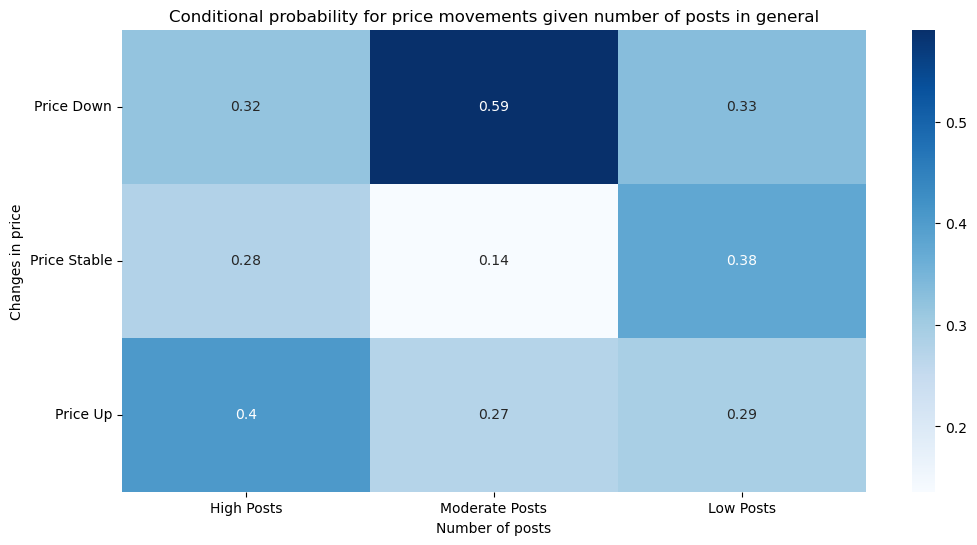

In [144]:
plot_probability_heatmap(sum_of_matrices, 'Conditional probability for price movements given number of posts in general')

[[0.32280184 0.66449216 0.33345826]
 [0.20848021 0.09001166 0.37549657]
 [0.46871795 0.24549618 0.29104517]]


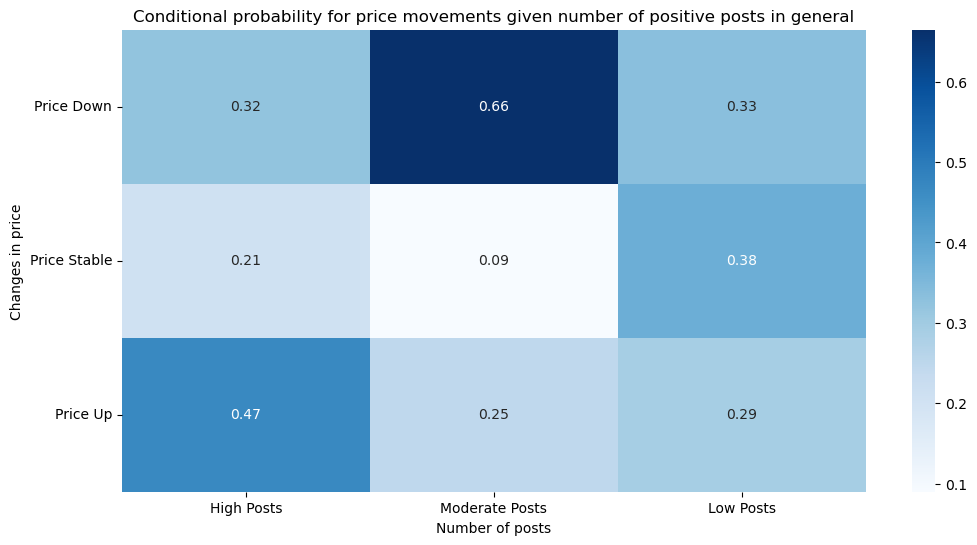

In [145]:
# Loop through each symbol in valid_symbols
for symbol in valid_symbols:
    temp_df = symbols_posts_data[symbol]
    
    # Assuming probability_bayesian_inference_posts expects arrays as inputs
    dates = temp_df['date'].values  # Convert Series to numpy array
    daily_changes = temp_df['daily_change'].values
    number_of_posts = temp_df['number_of_positive_posts'].values
    
    # Pass the arrays to the function and store the result
    _, symbol_probabilities_matrices[symbol] = dict_to_matrix(probability_bayesian_inference_posts(dates, daily_changes, number_of_posts))

warnings.filterwarnings("ignore")

sum_of_matrices = None 
for matrix in symbol_probabilities_matrices.values():
    if sum_of_matrices is None:
        sum_of_matrices = matrix
    else:
        sum_of_matrices += matrix
    
sum_of_matrices /= len(symbol_probabilities_matrices.values())

sum_of_matrices = normalize_matrix(sum_of_matrices)
print(sum_of_matrices)




plot_probability_heatmap(sum_of_matrices, 'Conditional probability for price movements given number of positive posts in general')


[[0.54063487 0.54539218 0.32465996]
 [0.15614346 0.07558657 0.37428606]
 [0.30322167 0.37902125 0.30105398]]


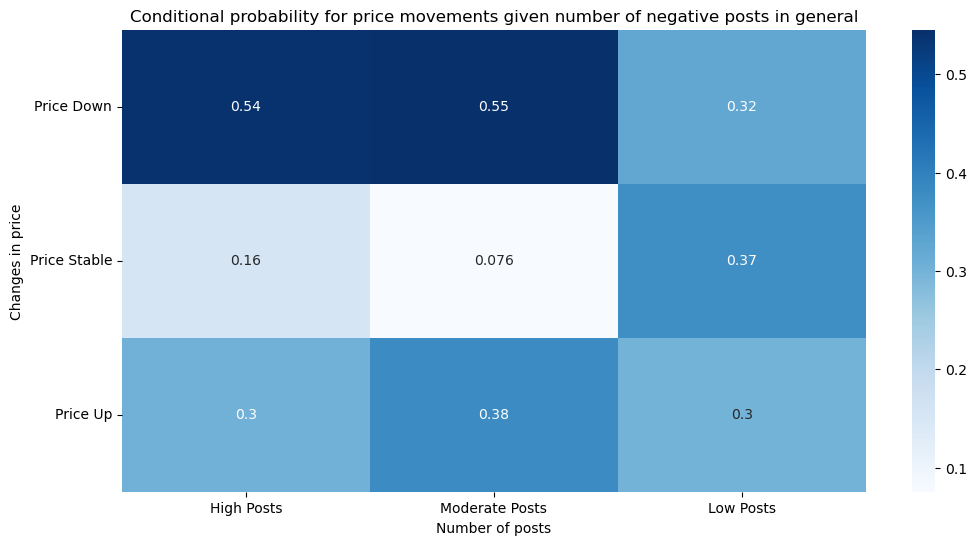

In [146]:
# Loop through each symbol in valid_symbols
for symbol in valid_symbols:
    temp_df = symbols_posts_data[symbol]
    
    # Assuming probability_bayesian_inference_posts expects arrays as inputs
    dates = temp_df['date'].values  # Convert Series to numpy array
    daily_changes = temp_df['daily_change'].values
    number_of_posts = temp_df['number_of_negative_posts'].values
    
    # Pass the arrays to the function and store the result
    _, symbol_probabilities_matrices[symbol] = dict_to_matrix(probability_bayesian_inference_posts(dates, daily_changes, number_of_posts))

warnings.filterwarnings("ignore")

sum_of_matrices = None 
for matrix in symbol_probabilities_matrices.values():
    if sum_of_matrices is None:
        sum_of_matrices = matrix
    else:
        sum_of_matrices += matrix
    
sum_of_matrices /= len(symbol_probabilities_matrices.values())

sum_of_matrices = normalize_matrix(sum_of_matrices)
print(sum_of_matrices)




plot_probability_heatmap(sum_of_matrices, 'Conditional probability for price movements given number of negative posts in general')


### 2.2: Calculating probability using Markov Chains

#### 2.2.1: Create a function to Aggregate Stock Price and Social Media Sentiment Data by 30-Minute Intervals for Symbol Analysis

In [147]:
import re
import os
import pandas as pd
from dateutil.parser import isoparser
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def to_post_analysis_dataframe(symbol_name):
    # Load price data for the symbol
    price_data_frame = symbol_price_data_dict[symbol_name]

    # Retrieve social media posts data for the symbol from the symbols_data dictionary
    symbol_posts_data_frame = symbols_data_dict[symbol_name]
    
    # Parse 'time' column in price data frame to datetime format, handling null values
    price_data_frame['time'] = price_data_frame['time'].astype('string')
    price_data_frame['time'] = price_data_frame['time'].apply(
        lambda x: isoparser().isoparse(x) if pd.notnull(x) else pd.NaT
    )
    
    # Round posts' timestamps to the nearest 30 minutes and remove timezone information
    symbol_posts_data_frame['time'] = symbol_posts_data_frame['time'].dt.floor('30T')
    symbol_posts_data_frame['time'] = symbol_posts_data_frame['time'].dt.tz_localize(None)
    
    # Perform a left join on 'time' column to merge price data with social media posts data
    merge_df = pd.merge(price_data_frame, symbol_posts_data_frame, on='time', how='left')
    
    # Group by 'time' and aggregate key statistics for both price and social media data
    if 'volume' in merge_df:
        result_df = merge_df.groupby('time').agg(
            number_of_posts=('postID', 'count'),  # Count of total posts
            number_positive_posts=('sentiment', lambda x: (x == 'positive').sum()),  # Positive posts count
            number_of_negative_posts=('sentiment', lambda x: (x == 'negative').sum()),  # Negative posts count
            number_of_netral_posts=('sentiment', lambda x: (x == 'neutral').sum()),  # Neutral posts count
            average_price_mentioned=('price', 'mean'),  # Average price mentioned in posts
            open=('open', 'first'),  # Opening price
            high=('high', 'first'),  # High price
            low=('low', 'first'),  # Low price
            close=('close', 'first'),  # Closing price
            volume=('volume', 'first'),  # Volume
            average_post_length=('word_count', 'mean'),  # Average word count in posts
        ).reset_index()
    else:
        result_df = merge_df.groupby('time').agg(
            number_of_posts=('postID', 'count'),  # Count of total posts
            number_positive_posts=('sentiment', lambda x: (x == 'positive').sum()),  # Positive posts count
            number_of_negative_posts=('sentiment', lambda x: (x == 'negative').sum()),  # Negative posts count
            number_of_netral_posts=('sentiment', lambda x: (x == 'neutral').sum()),  # Neutral posts count
            average_price_mentioned=('price', 'mean'),  # Average price mentioned in posts
            open=('open', 'first'),  # Opening price
            high=('high', 'first'),  # High price
            low=('low', 'first'),  # Low price
            close=('close', 'first'),  # Closing price
            average_post_length=('word_count', 'mean'),  # Average word count in posts
        ).reset_index()
        
    
    
    
    # Round all numeric columns to 2 decimal places for readability
    result_df = result_df.round(2)
    
    # Replace any remaining NaN values with 0
    result_df.fillna(0, inplace=True)

    return result_df


#### 2.2.2: Categorizing Posts and Analyzing Price State Transitions

Categorizing posts by activity levels, defines stock price states based on changes, creates transition matrices to analyze state shifts, and visualizes the results with heatmaps.

##### Functions

1. **`categorize_posts(posts, mean_posts, std_posts)`**
   - Categorizes post counts as **High**, **Moderate**, or **Low** based on deviations from the mean.

2. **`define_state(change, threshold=0.01)`**
   - Defines stock price states as **Price Up**, **Price Down**, or **Price Stable** based on the change threshold.

3. **`df_to_transitions_matrix(df)`**
   - Validates `df` as a DataFrame and calculates mean and std dev for post counts.
   - Computes daily percentage price changes.
   - Categorizes post counts and assigns price states.
   - Creates three transition matrices: overall state transitions, positive post transitions, and negative post transitions.

4. **`heatmap_illustration(matrix, title, xlabel, ylabel)`**
   - Visualizes transition matrices as heatmaps with annotations for probabilities.



In [148]:
# Categorize the number of posts based on standard deviation from the mean
def categorize_posts(posts, mean_posts, std_posts):
    # If posts exceed mean + std, categorize as 'high'
    if posts > mean_posts + std_posts:
        return 'high number of posts'
    # If posts are within one std deviation from the mean, categorize as 'moderate'
    if abs(posts - mean_posts) <= std_posts:
        return 'moderate number of posts'
    # Otherwise, categorize as 'low'
    return 'low number of posts'

# Define state based on the change in price and a given threshold
def define_state(change, threshold=0.01):
    # If change exceeds threshold, label as 'Price Up'
    if change > threshold:
        return 'Price Up'
    # If change is below negative threshold, label as 'Price Down'
    if change < -threshold:
        return 'Price Down'
    # Otherwise, label as 'Price Stable'
    return 'Price Stable'

# Convert the DataFrame into a transitions matrix for state transitions
def df_to_transitions_matrix(df):
    # Check if df is a DataFrame, return None if not
    if not isinstance(df, pd.DataFrame):
        return None
    
    # Calculate mean and std dev for post counts
    mean_posts = df['number_of_posts'].mean()
    std_posts = df['number_of_posts'].std()
    
    # Calculate daily percentage price change and fill NaN values with 0
    df['pecentage_price_change'] = df['close'].pct_change() * 100
    df['pecentage_price_change'].fillna(0, inplace=True)

    # Categorize post counts and define state based on price change
    df['post_category'] = df['number_of_posts'].apply(lambda x: categorize_posts(x, mean_posts, std_posts))
    df['state'] = df['pecentage_price_change'].apply(define_state)
    
    # Shift 'state' to get 'next_state' column, drop rows with NaN in 'next_state'
    df['next_state'] = df['state'].shift(-1)
    df.dropna(subset=['next_state'], inplace=True)
    
    # Update post category columns based on recalculated mean and std dev for consistency
    mean_posts = df['number_of_posts'].mean()
    std_posts = df['number_of_posts'].std()
    df['post_category'] = df['number_of_posts'].apply(lambda x: categorize_posts(x, mean_posts, std_posts))
    
    # Calculate mean and std dev for positive and negative posts and categorize accordingly
    std_positive_posts = df['number_positive_posts'].std()
    mean_positive_posts = df['number_positive_posts'].mean()
    df['Positive_post_category'] = df['number_positive_posts'].apply(lambda x: categorize_posts(x, mean_positive_posts, std_positive_posts))
    
    std_negative_posts = df['number_of_negative_posts'].std()
    mean_negative_posts = df['number_of_negative_posts'].mean()
    df['Negative_post_category'] = df['number_of_negative_posts'].apply(lambda x: categorize_posts(x, mean_negative_posts, std_negative_posts))
    
    # Create a transition matrix based on current and next states
    transition_counts = pd.crosstab(df['state'], df['next_state'])
    transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
    
    # Transition matrix for number of posts based on current state and positive post category
    transition_posts_count = pd.crosstab(
        [df['state'], df['post_category']],
        df['next_state']
    )
    transition_posts_matrix = transition_posts_count.div(transition_posts_count.sum(axis = 1), axis = 0)
    
    # Transition matrix for positive posts based on current state and positive post category
    transition_positive_posts_count = pd.crosstab(
        [df['state'], df['Positive_post_category']],
        df['next_state']
    )
    transition_positive_posts_matrix = transition_positive_posts_count.div(transition_positive_posts_count.sum(axis=1), axis=0)
    
    # Transition matrix for negative posts based on current state and negative post category
    transition_negative_posts_count = pd.crosstab(
        [df['state'], df['Negative_post_category']],
        df['next_state']
    )
    transition_negative_posts_matrix = transition_negative_posts_count.div(transition_negative_posts_count.sum(axis=1), axis=0)
    
    transition_matrix.fillna(0, inplace = True)
    transition_posts_matrix.fillna(0 ,inplace = True)
    transition_negative_posts_matrix.fillna(0, inplace = True)
    transition_positive_posts_matrix.fillna(0, inplace = True)
    # Return the three transition matrices
    return transition_matrix, transition_posts_matrix, transition_negative_posts_matrix, transition_positive_posts_matrix

# Visualize the transition matrix using a heatmap
def heatmap_illustration(matrix, title, xlabel, ylabel):
    """
    Visualize a transition matrix using a heatmap with a color map emphasizing
    small values as bright and large values as dark.
    
    Parameters:
        matrix (DataFrame or ndarray): Transition matrix to visualize.
        title (str): Title of the heatmap.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(14, 8))
    
    # Create a heatmap with sequential colormap (e.g., 'Blues') for brightness control
    sns.heatmap(matrix, 
                annot=True, 
                cbar_kws={'label': 'Transition Probability'}, 
                cmap='Reds',  # Use 'Blues' for small values brighter and large values darker
                fmt='.2f',     # Format annotations to 2 decimal places
                vmin=0,        # Minimum value for color scale
                vmax=1)        # Maximum value for color scale
    
    # Set title and labels for axes
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.yticks(rotation=0)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


In [149]:
# check if function work properly
VNINDEX_df = to_post_analysis_dataframe('VNINDEX')
VNINDEX_df.head(1)

,time,number_of_posts,number_positive_posts,number_of_negative_posts,number_of_netral_posts,average_price_mentioned,open,high,low,close,volume,average_post_length
0,2024-09-04 09:00:00,0,0,0,0,0.0,1273.86,1273.86,1268.53,1271.34,76561000,0.0


In [150]:
transition_matrix, transition_posts_matrix, transition_negative_posts_matrix, transition_positive_posts_matrix = df_to_transitions_matrix(VNINDEX_df)

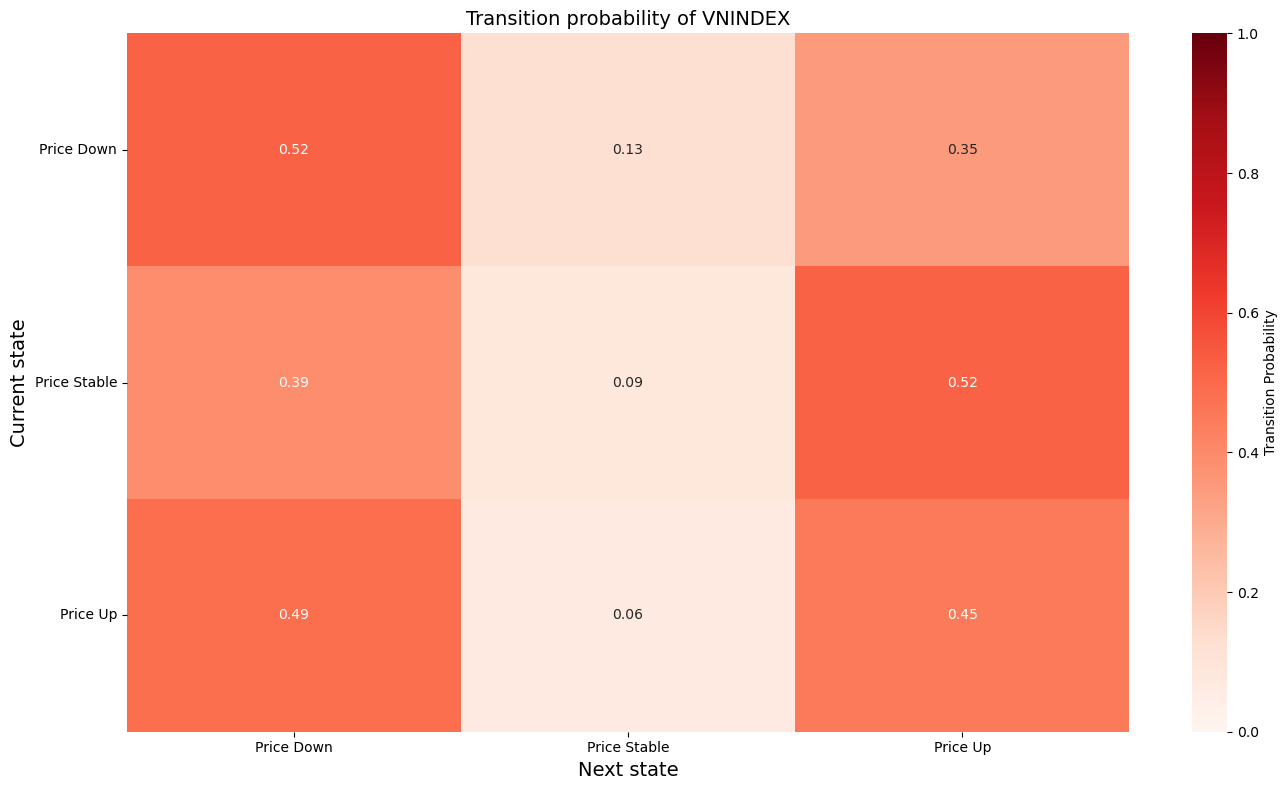

In [151]:
heatmap_illustration(transition_matrix, 'Transition probability of VNINDEX', 'Next state', 'Current state')

In [152]:
transition_posts_matrix

next_state                             Price Down  Price Stable  Price Up
state        post_category                                               
Price Down   high number of posts        0.714286      0.028571  0.257143
             low number of posts         0.583333      0.208333  0.208333
             moderate number of posts    0.473373      0.136095  0.390533
Price Stable high number of posts        0.500000      0.000000  0.500000
             low number of posts         0.428571      0.047619  0.523810
             moderate number of posts    0.347826      0.130435  0.521739
Price Up     high number of posts        0.500000      0.100000  0.400000
             low number of posts         0.714286      0.000000  0.285714
             moderate number of posts    0.464516      0.064516  0.470968

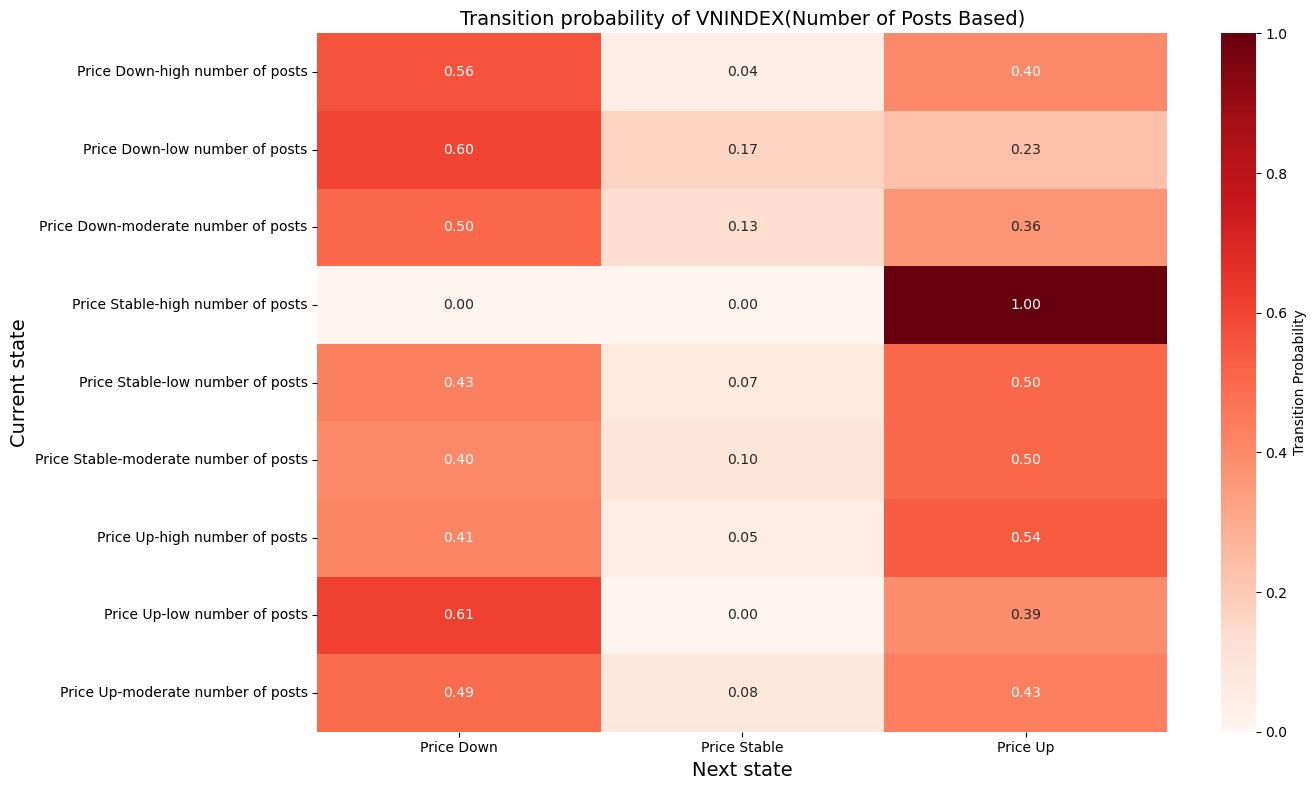

In [153]:
heatmap_illustration(transition_positive_posts_matrix, 'Transition probability of VNINDEX(Number of Posts Based)', 'Next state', 'Current state')

In [154]:
transition_positive_posts_matrix

next_state                             Price Down  Price Stable  Price Up
state        Positive_post_category                                      
Price Down   high number of posts        0.560000      0.040000  0.400000
             low number of posts         0.600000      0.166667  0.233333
             moderate number of posts    0.502890      0.132948  0.364162
Price Stable high number of posts        0.000000      0.000000  1.000000
             low number of posts         0.428571      0.071429  0.500000
             moderate number of posts    0.400000      0.100000  0.500000
Price Up     high number of posts        0.414634      0.048780  0.536585
             low number of posts         0.611111      0.000000  0.388889
             moderate number of posts    0.492308      0.076923  0.430769

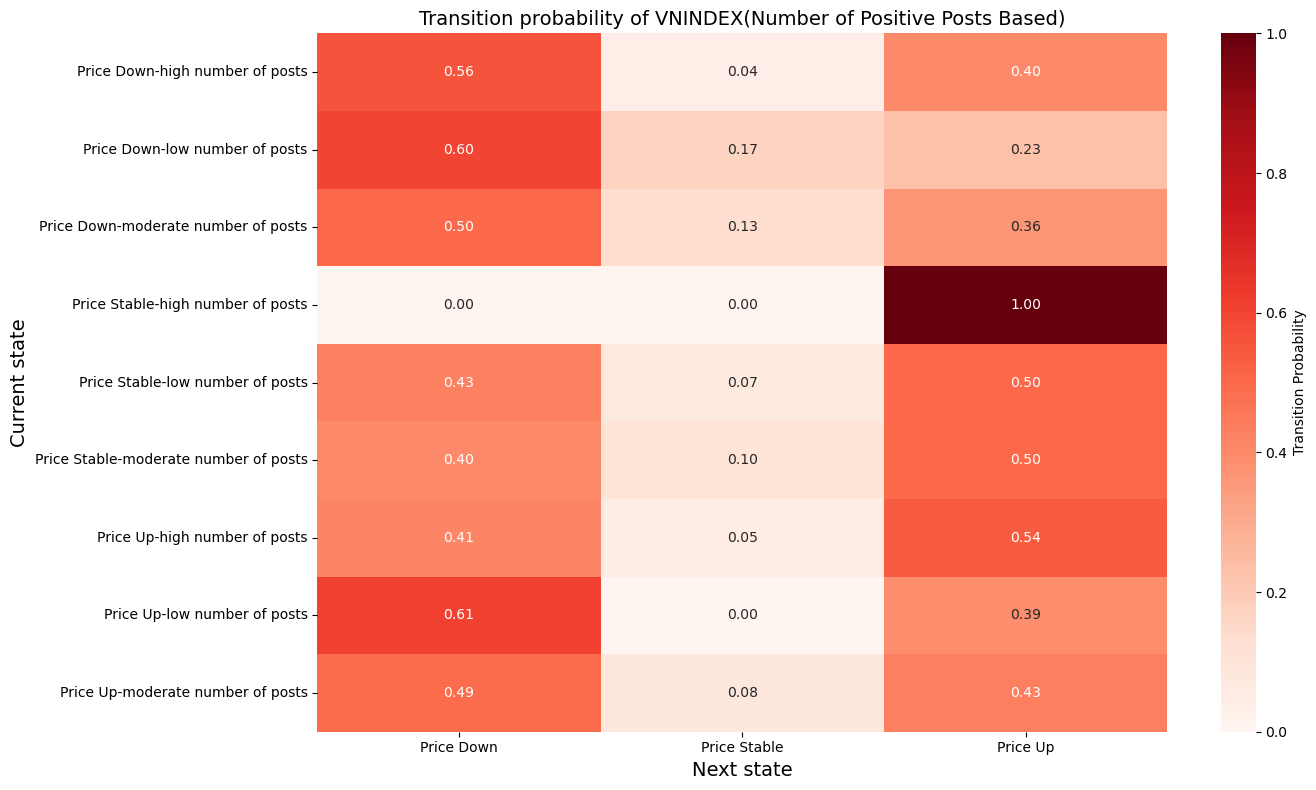

In [155]:
heatmap_illustration(transition_positive_posts_matrix, 'Transition probability of VNINDEX(Number of Positive Posts Based)', 'Next state', 'Current state')

In [156]:
transition_negative_posts_matrix

next_state                             Price Down  Price Stable  Price Up
state        Negative_post_category                                      
Price Down   high number of posts        0.620000      0.100000  0.280000
             low number of posts         0.653846      0.192308  0.153846
             moderate number of posts    0.467105      0.125000  0.407895
Price Stable high number of posts        0.500000      0.000000  0.500000
             low number of posts         0.416667      0.083333  0.500000
             moderate number of posts    0.375000      0.093750  0.531250
Price Up     high number of posts        0.625000      0.125000  0.250000
             low number of posts         0.611111      0.000000  0.388889
             moderate number of posts    0.458065      0.064516  0.477419

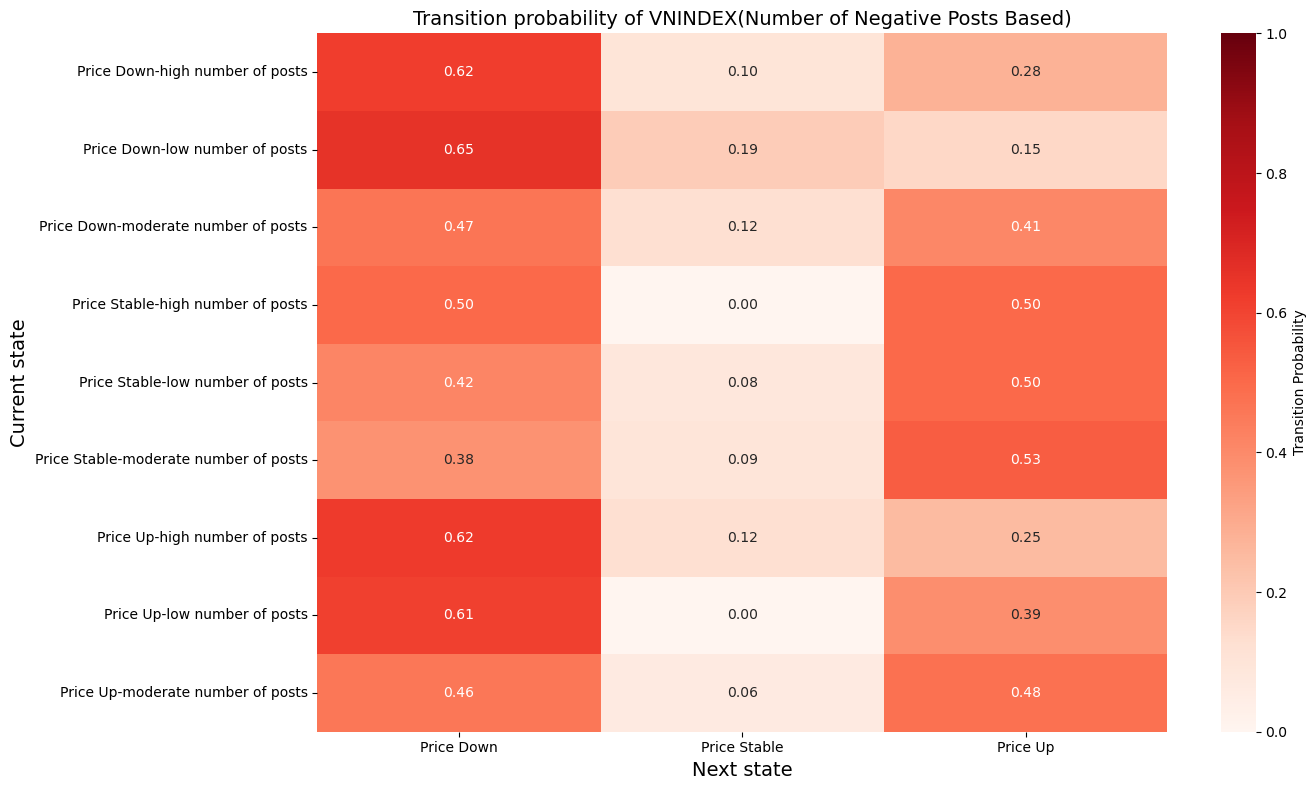

In [157]:
heatmap_illustration(transition_negative_posts_matrix, 'Transition probability of VNINDEX(Number of Negative Posts Based)', 'Next state', 'Current state')

#### 2.3: Using machine learning models to categorize posts sentiment. Predict changes in price based on new posts sentiment and top users activities.

In [158]:
import string 

import nltk 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

stop_words = pd.read_csv('vietnamese-stopwords.csv')
stop_words = stop_words['word'].tolist()
stop_words = set(stop_words)

In [159]:
post_content_for_model = posts_df[['originalContent', 'sentiment']]
# drop duplicates in orgingalContent
post_content_for_model.drop_duplicates(subset = 'originalContent', inplace = True)
post_content_for_model = post_content_for_model[post_content_for_model['sentiment'] != 'neutral']

def preprocess_text_optimized(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join(word for word in text.split() if word not in stop_words)

post_content_for_model['originalContent'] = post_content_for_model['originalContent'].apply(preprocess_text_optimized)

post_content_for_model.head(2)


,originalContent,sentiment
28,dj rap 3 kinh khủng,positive
29,vui s full margin 435k ae,positive


In [160]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(post_content_for_model['originalContent'])
y = post_content_for_model['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [161]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [162]:
clf.score(X_test, y_test)

0.7554144559450291

In [163]:
post_to_classify = posts_df.loc[posts_df['sentiment'] == 'neutral', 'originalContent']
post_to_classify


0                                                 Vkl luôn 
1         Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...
2                   Tăng 1 phát bằng vn làm hai mấy năm :))
3                                   Má đáng full tiền...đau
4                                            Gap khủng long
                                ...                        
487263                                **** nhau quá đáng vc
487264             CON NÀY NÓ CHẾT DẬP CHẾT DỤI QUÁ CƠ, HIC
487265                           Múc ! Rũ để vượt đỉnh nào 
487266    Đừng mong giá rẻ hơn mấy ní ạ , đỏ ko mua xanh...
487267    nước ngoài mua 600 cổ rồi kia kìa mấy con dời ...
Name: originalContent, Length: 372614, dtype: string

In [164]:
x_post = vectorizer.transform(post_to_classify)
sentiment_predicted = clf.predict(x_post)

In [177]:
new_posts_df = posts_df.copy()
new_posts_df.loc[new_posts_df['sentiment'] == 'neutral', 'sentiment'] = sentiment_predicted
new_posts_df.head(2)

,postID,originalContent,time,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols,price,symbol,word_count,hour
0,29104030,Vkl luôn,2024-11-06 21:39:23.267000+07:00,2024-11-06,<NA>,negative,1,0,NaN,"{'symb': '^DJI', 'price': 43496.43}",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1,43496.43,^DJI,2,21
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06 21:39:05.220000+07:00,2024-11-06,<NA>,negative,0,0,NaN,NaN,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0,NaN,None,15,21
